In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u_0(x):
    """Initial data in real coordinates"""
    return 0.5 - abs(x - 0.5)

def heat_equation_solution_2(dt,dx,u_0):
    """u_t = u_xx on [0,1]x[0,1] with Direchlet boundary conditions
Crank-Nickolson in time, centered differencing in space."""
    def index_to_real(j,n):
        """Inputs are indices, outputs are real coordinates"""
        return j*dx, n*dt

    def u_0_indexed(j):
        """Initial data in index coordinates"""
        real_space, real_time = index_to_real(j,0)
        return u_0(real_space)

    J = int(1/dx)
    N = int(1/dt)
    alpha = dt/(2 * (dx ** 2))
    solution = np.zeros([J+1,N+1]) #First index is space, second index is time
    w_solution = []
    for n in range(N+1):
        w_solution.append( np.zeros([J-1]) )
    
    #define initial condition
    for j in range(J):
        solution[j,0] = u_0_indexed(j)
    
    #Define A matrix
    A = np.zeros([J-1,J-1])
    for i in range(J-1):
        if i == 0: #First row
            A[i,0] = 1 + 2* alpha
            A[i,1] = -alpha
        elif i == J-2: #Last row
            A[i,J-2] = 1 + 2 *alpha
            A[i,J-3] = -alpha
        else:   
            A[i,i-1] = -alpha
            A[i,i] = 1 + 2 *alpha
            A[i,i+1] = -alpha
    
    #Define B matrix
    B = np.zeros([J-1,J-1])
    for i in range(J-1):
        if i == 0: #First row
            B[i,0] = - 2* alpha
            B[i,1] = alpha
        elif i == J-2: #Last row
            B[i,J-2] = -2 *alpha
            B[i,J-3] = alpha
        else:   
            B[i,i-1] = alpha
            B[i,i] = - 2 *alpha
            B[i,i+1] = alpha
            
    #set initial condition (offset by -1)
    for j in range(J-1):
        w_solution[0][j] = u_0_indexed(j+1)
    
    #main for loop
    for n in range(N):
        w_solution[n+1] = np.linalg.solve(A,B@w_solution[n])
    return w_solution

def plot_soln(w_solution,dt,dx):
    J = int(1/dx)
    N = int(1/dt)
    X_values = dx*np.arange(J+1)
    Y_values = np.zeros([J+1])
    for n in range(N):
        for j in range(J+1):
            if j ==0:
                Y_values[j] = 0
            elif j == J:
                Y_values[j] = 0
            else:
                Y_values[j] = w_solution[n][j-1]
        plt.plot(X_values, Y_values)
        plt.ylabel(f'u solution at time {dt*n}')
        plt.show()

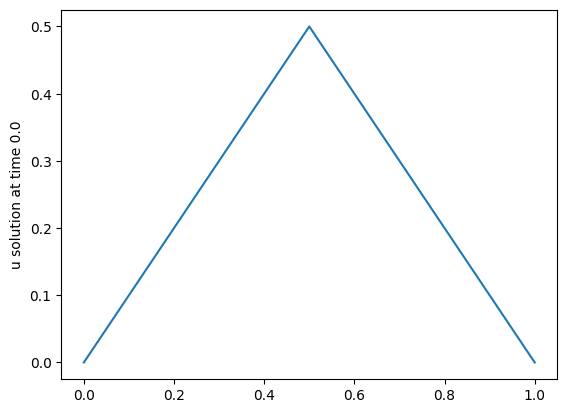

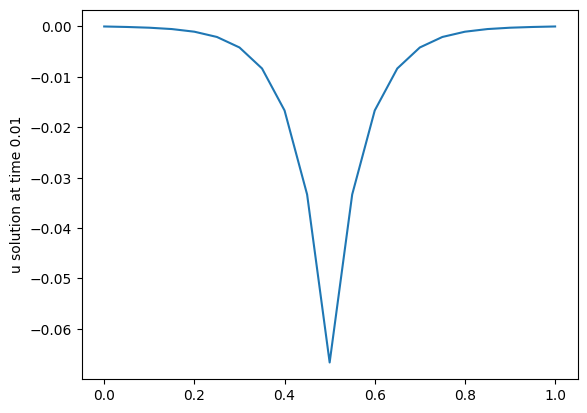

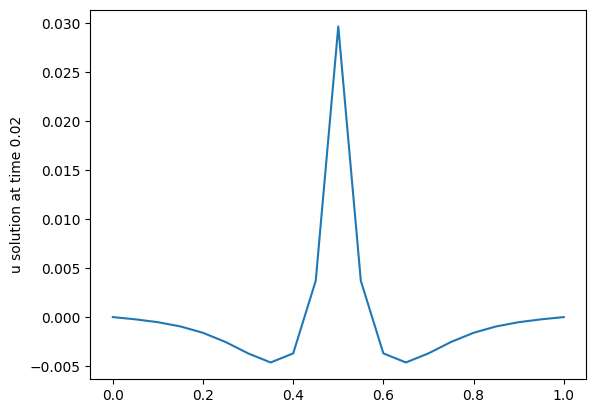

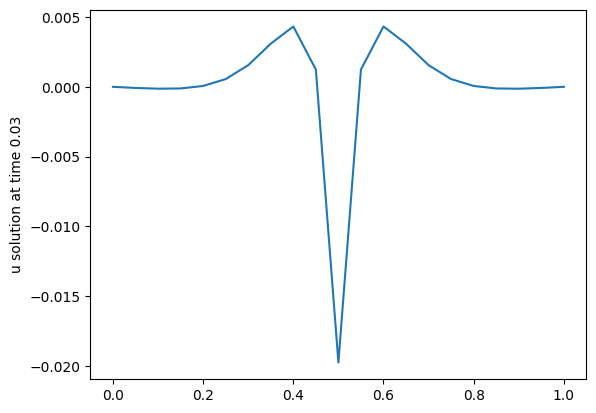

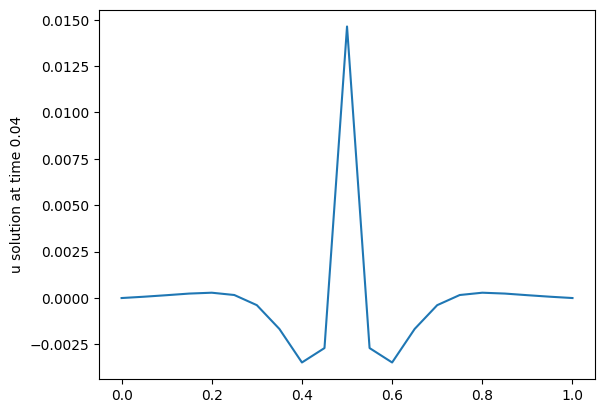

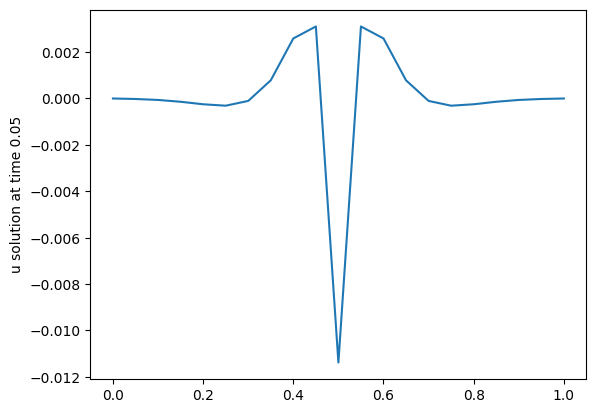

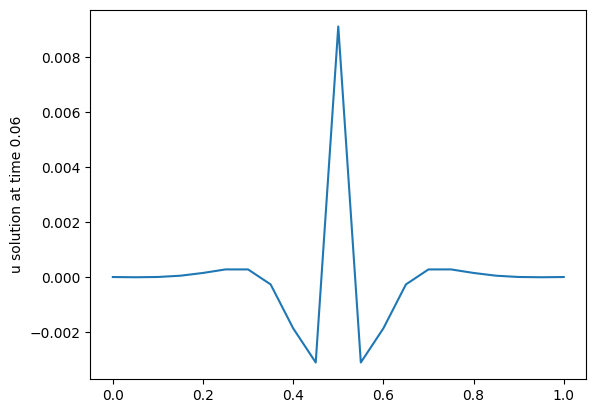

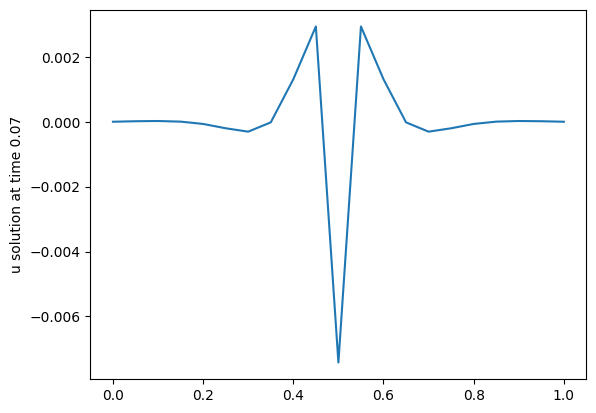

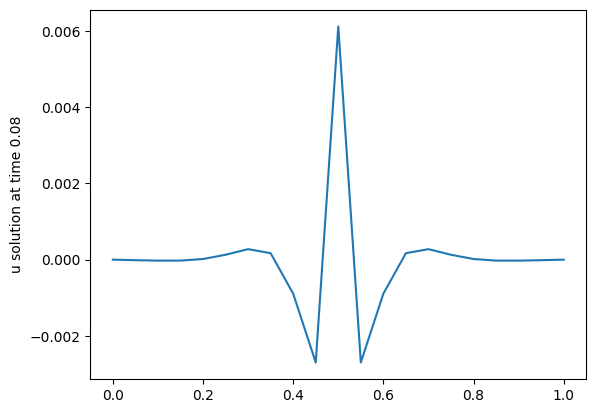

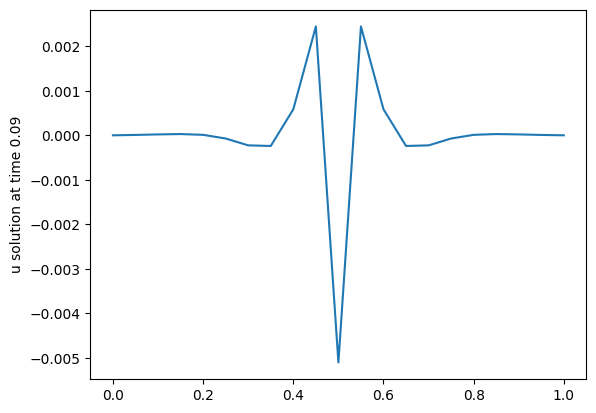

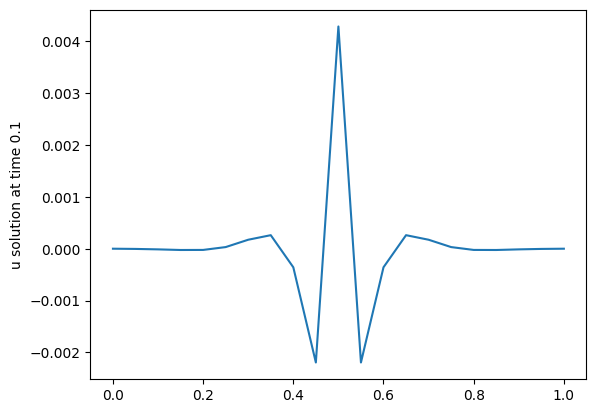

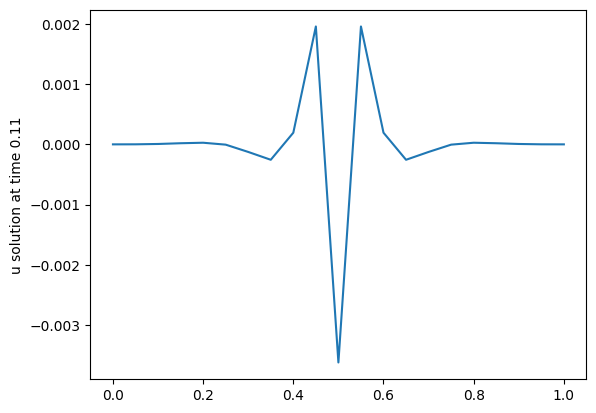

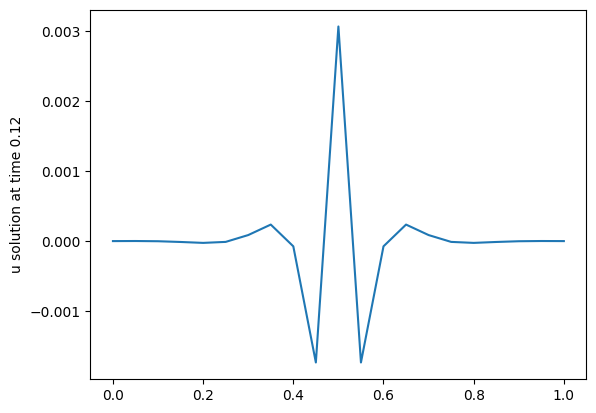

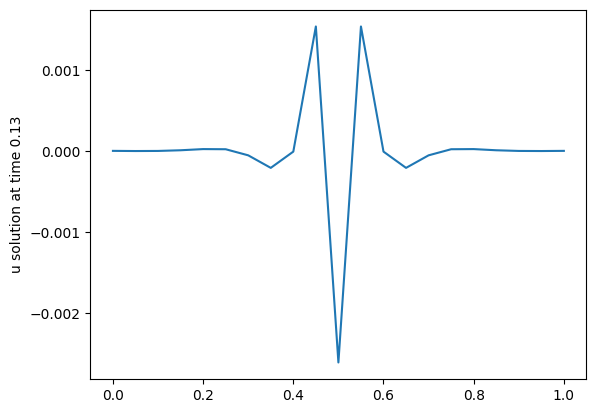

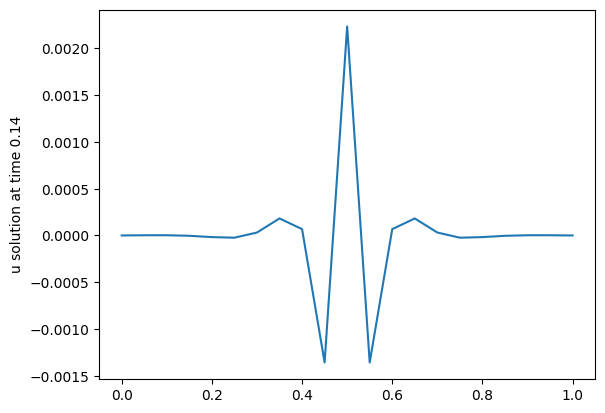

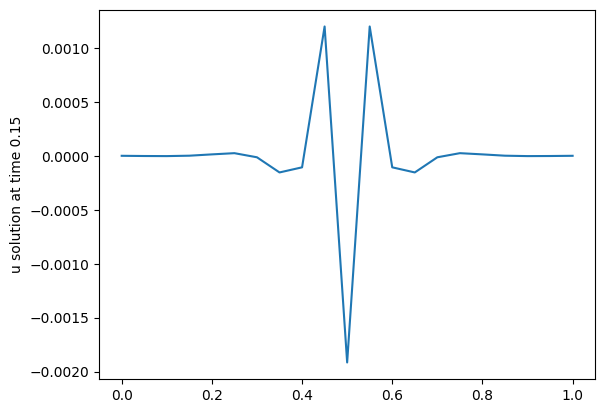

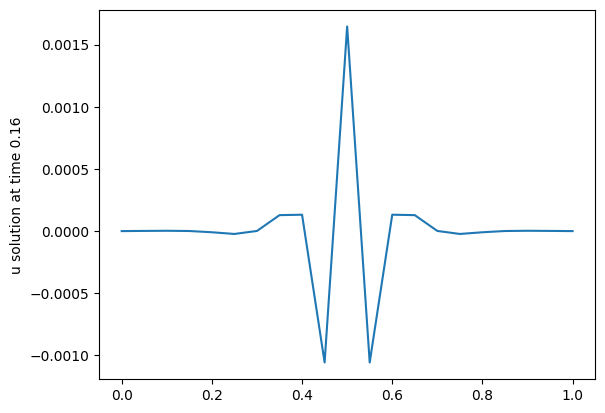

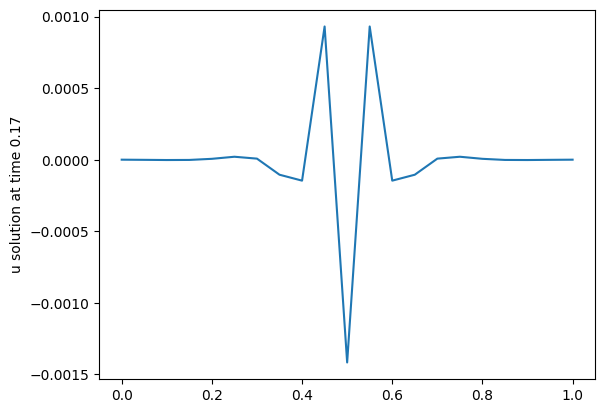

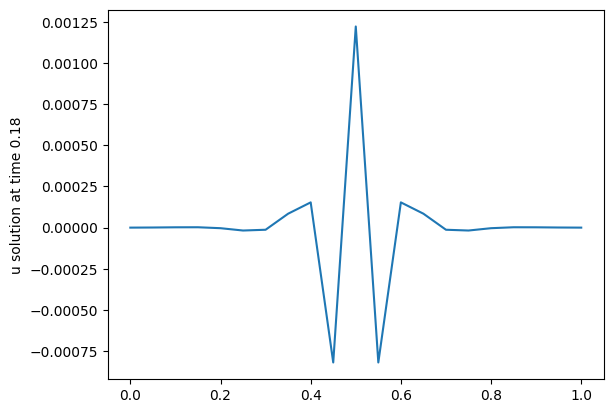

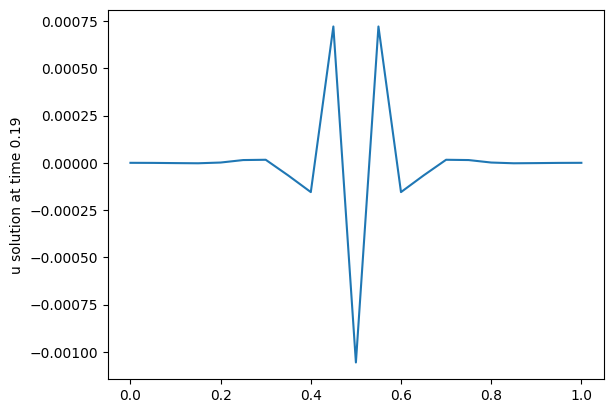

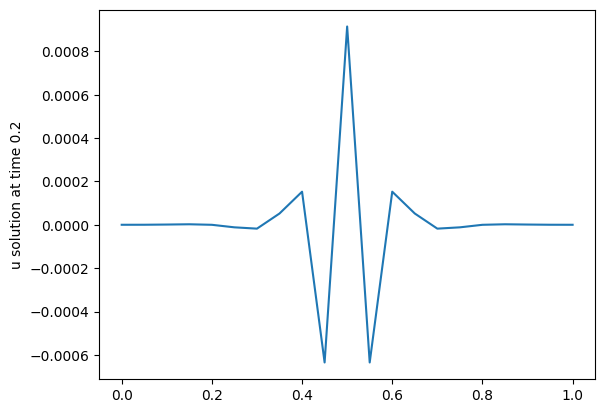

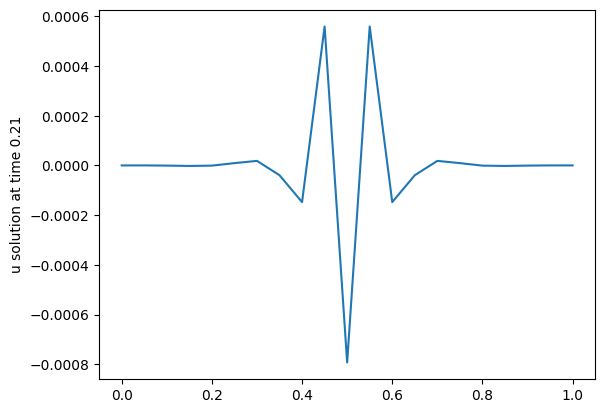

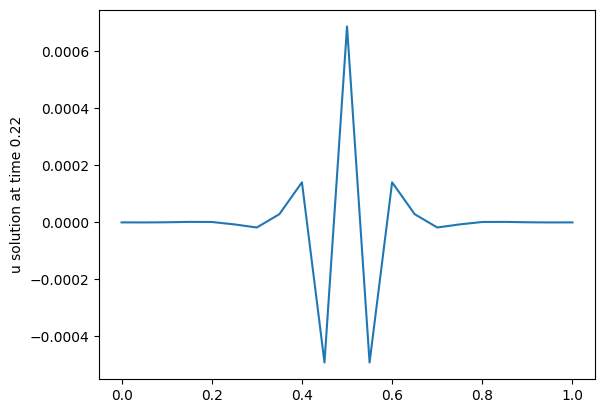

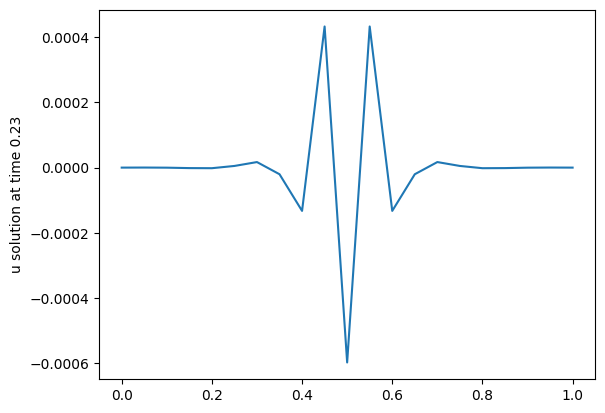

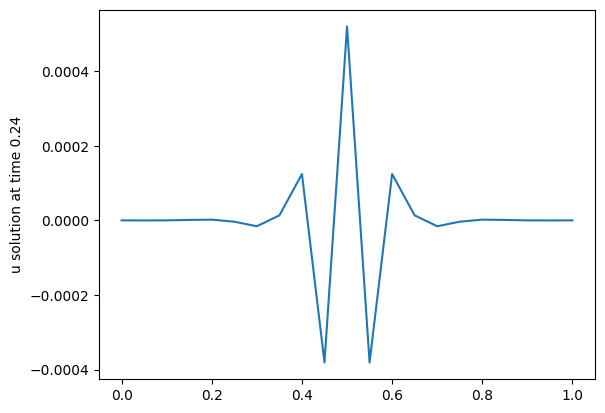

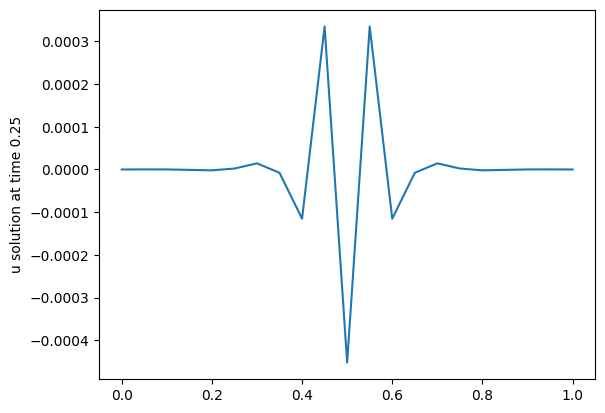

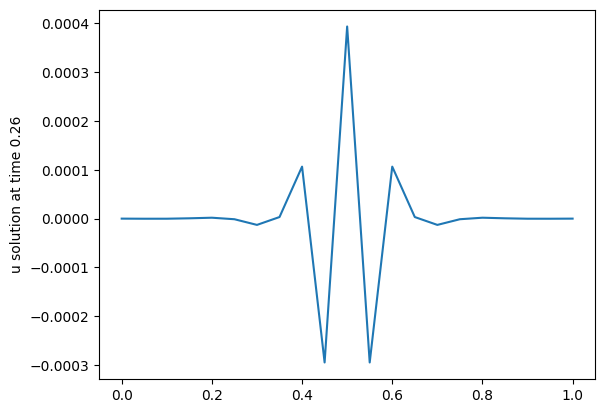

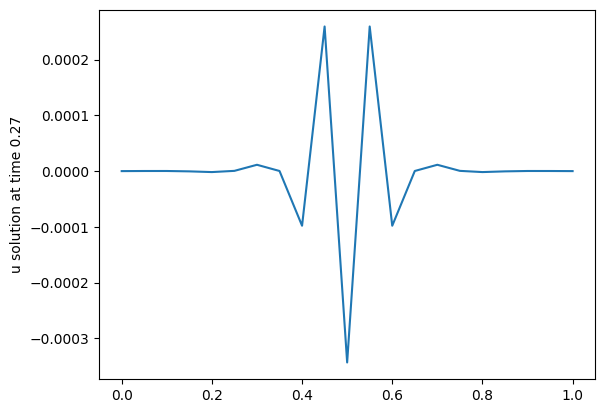

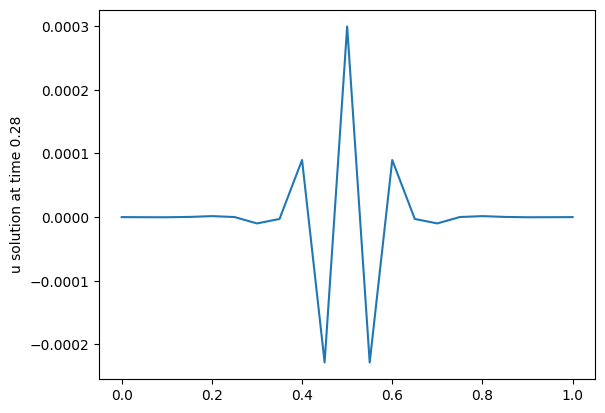

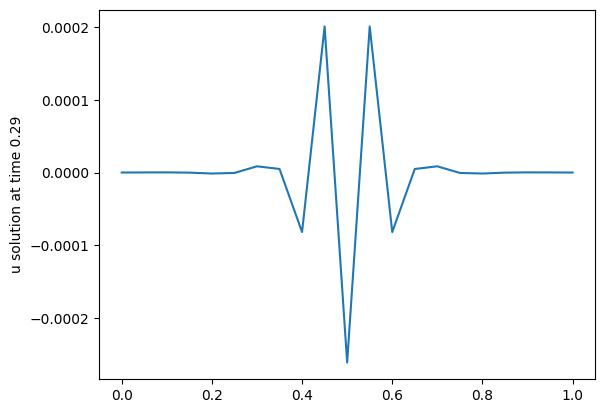

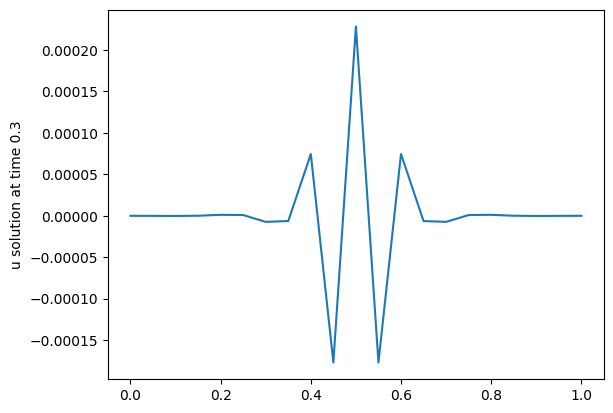

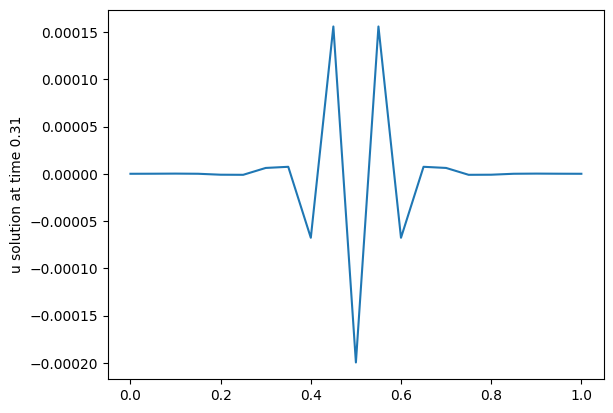

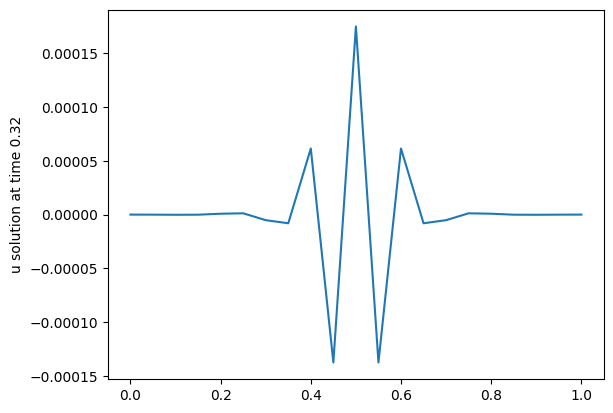

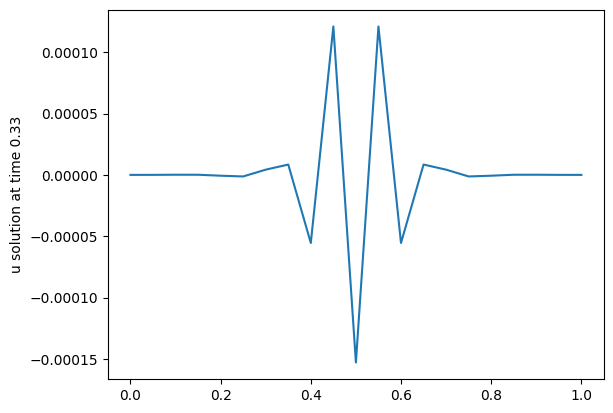

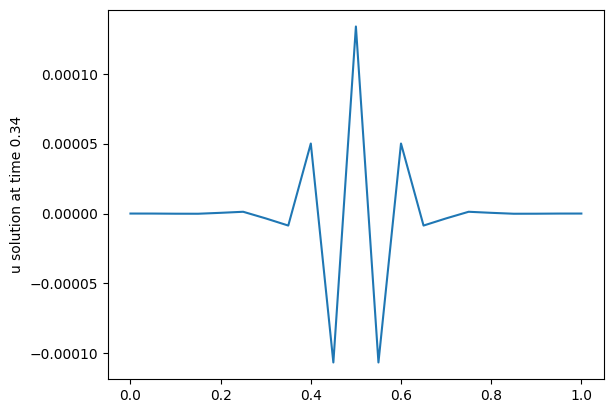

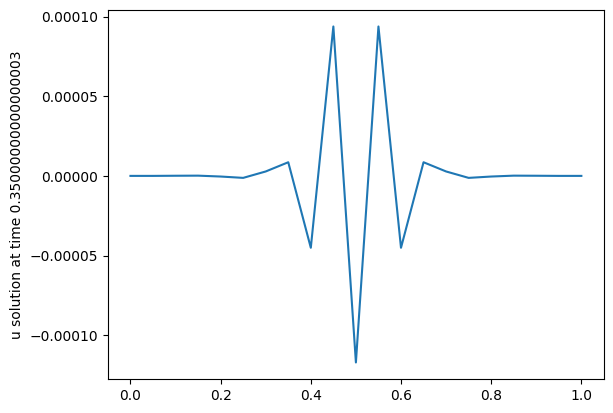

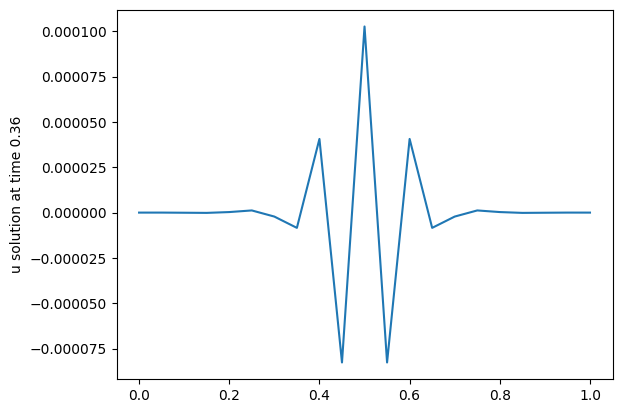

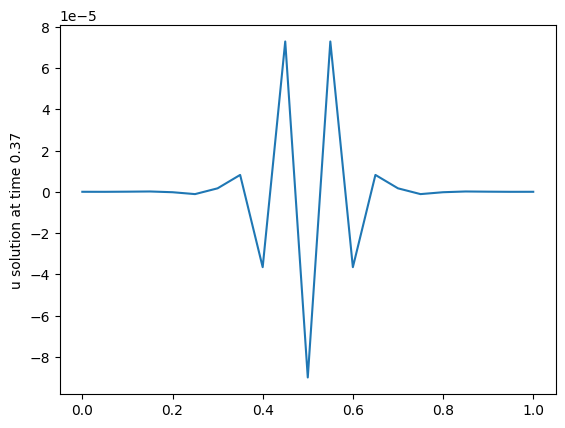

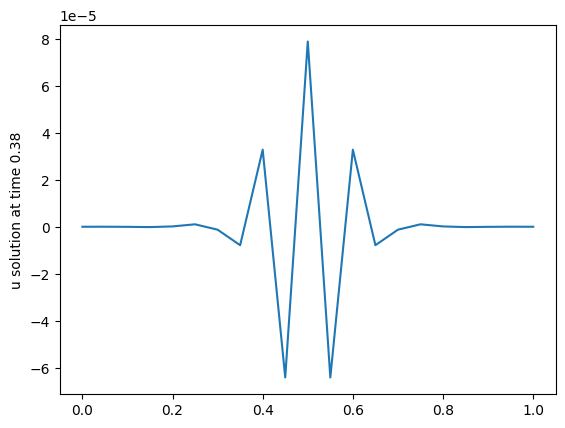

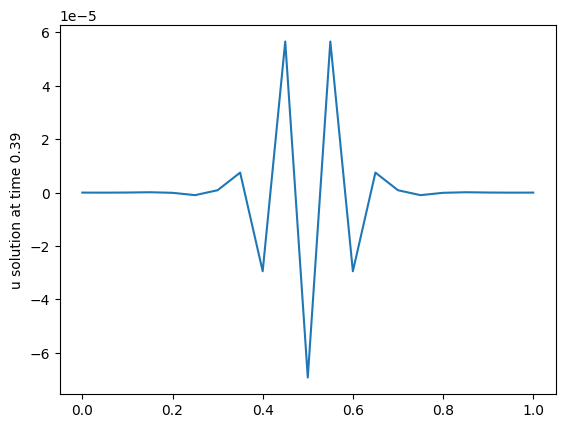

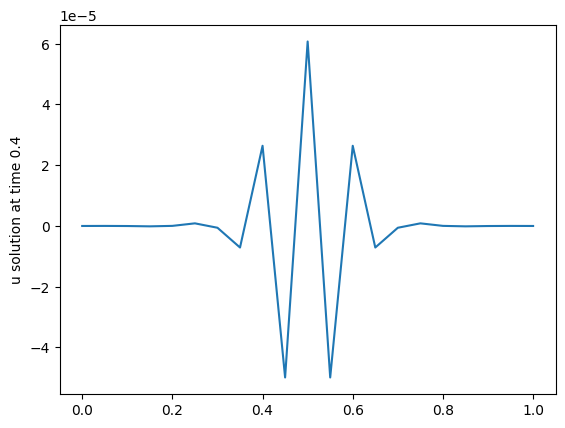

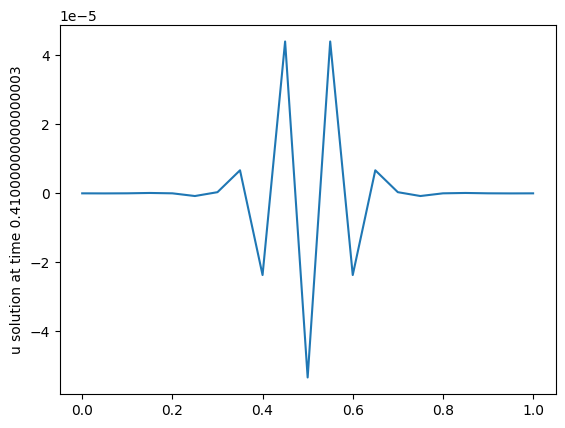

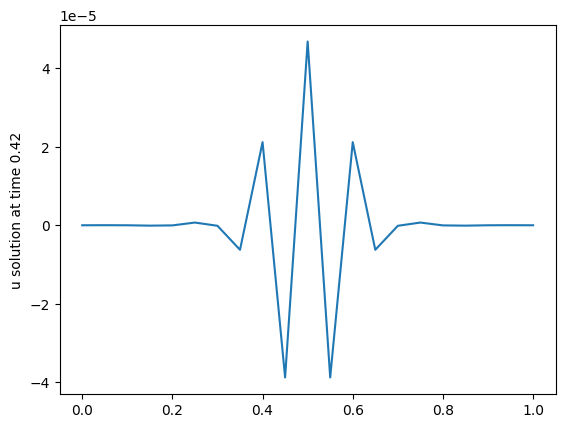

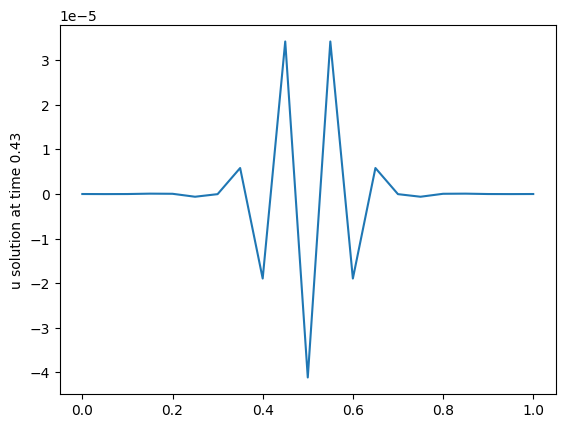

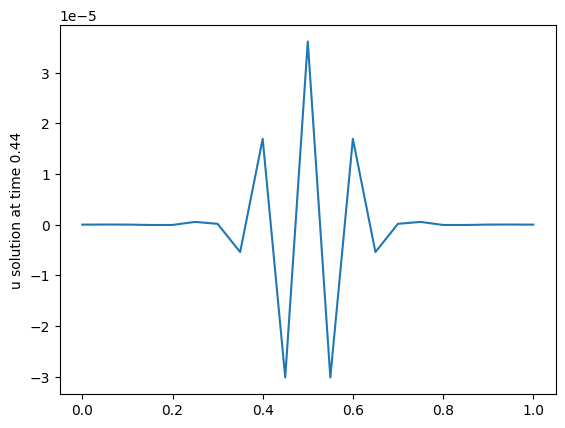

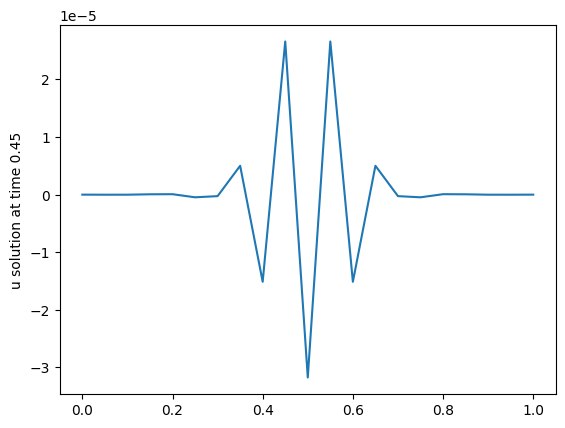

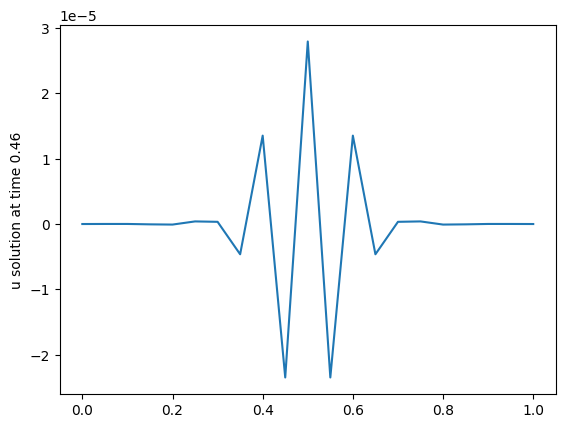

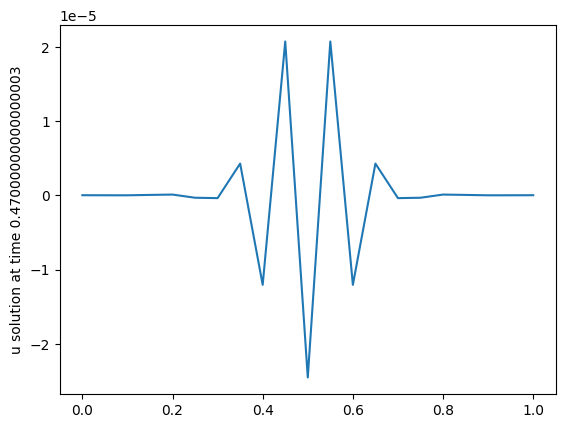

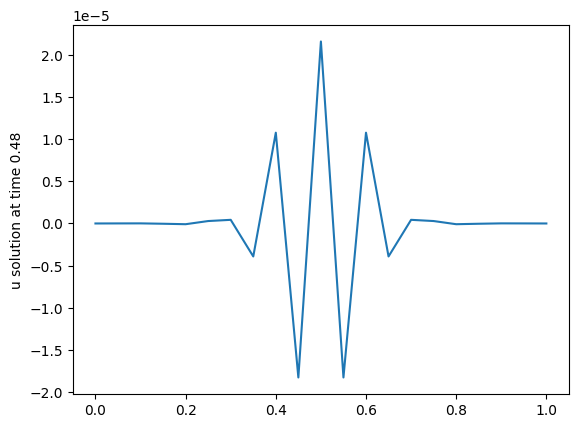

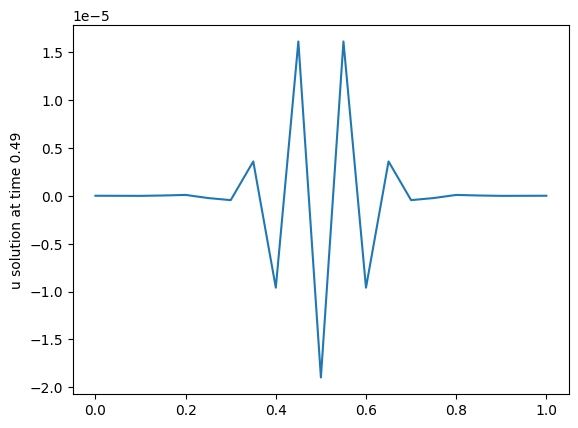

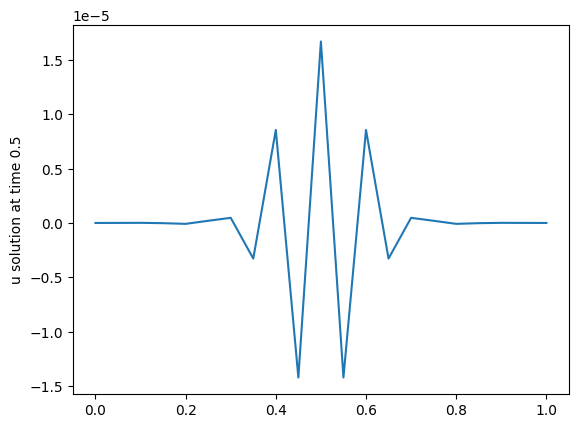

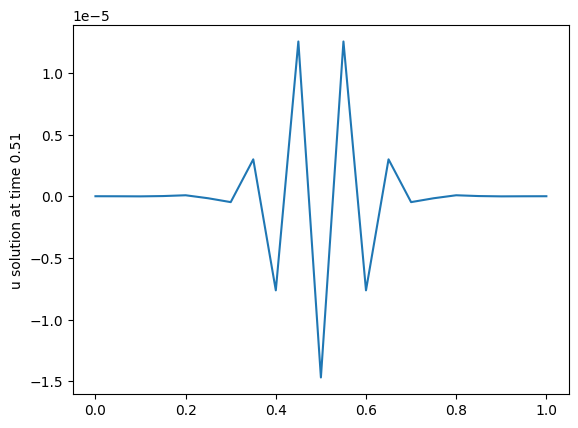

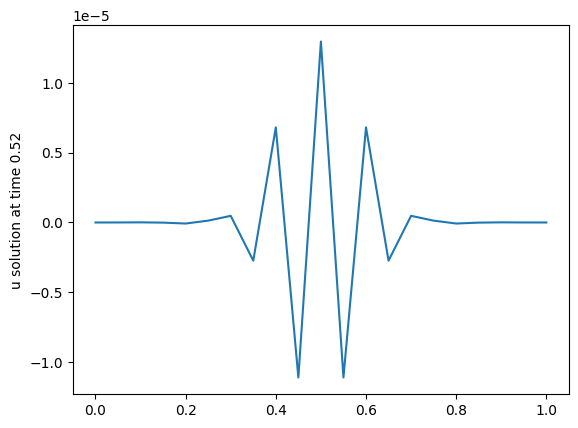

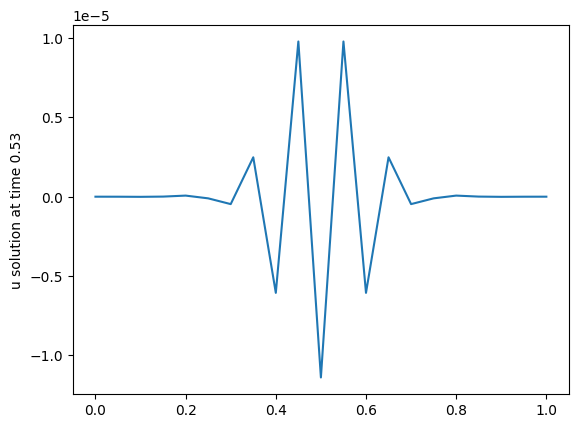

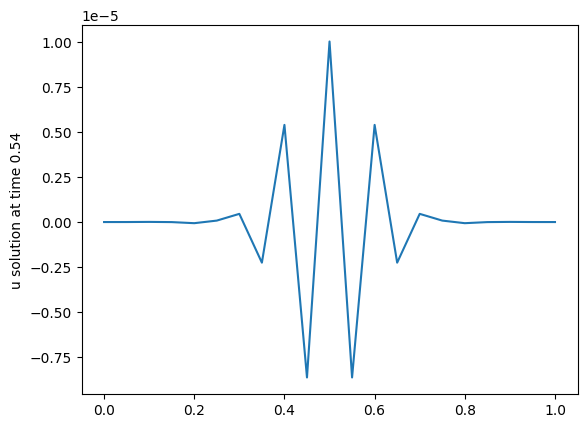

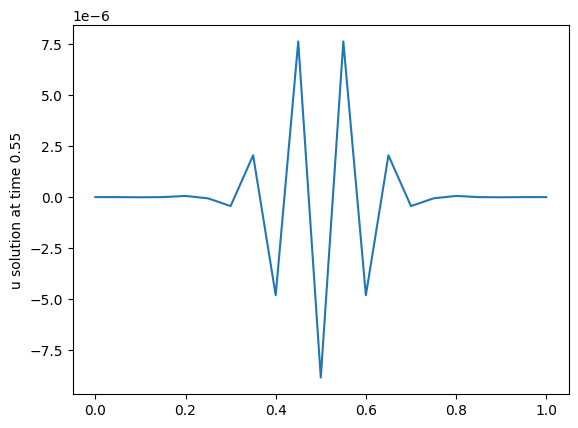

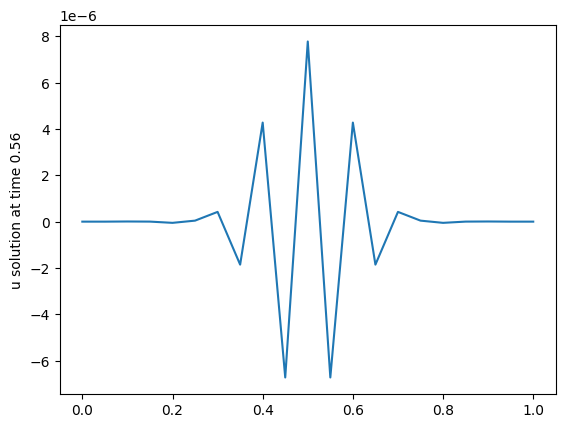

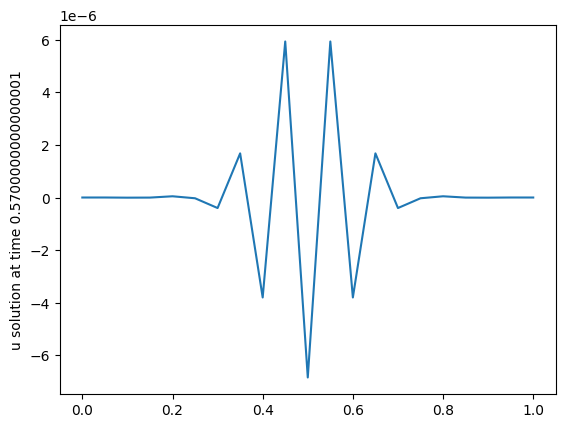

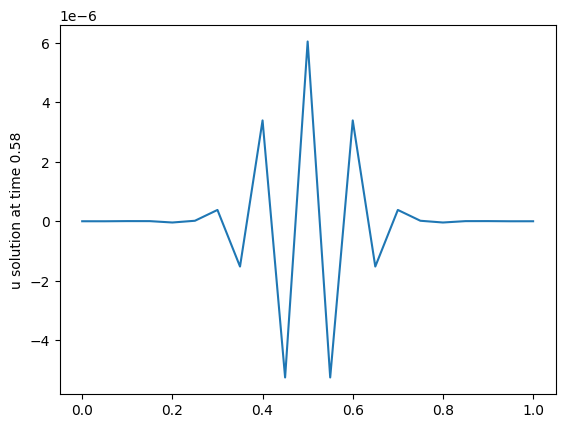

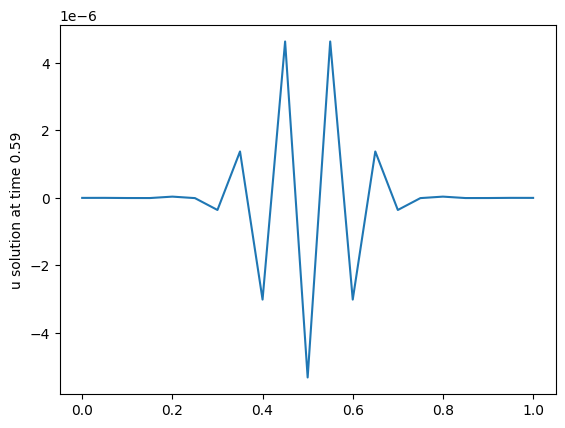

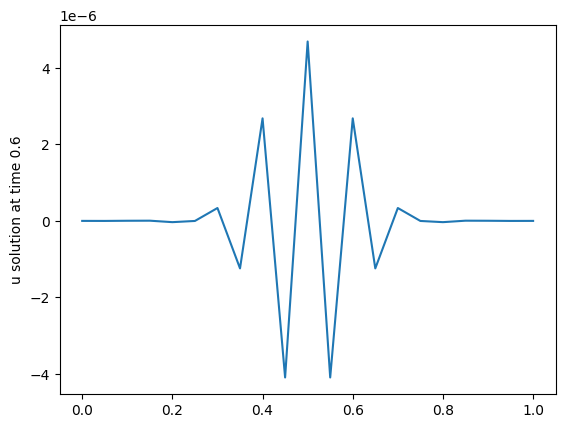

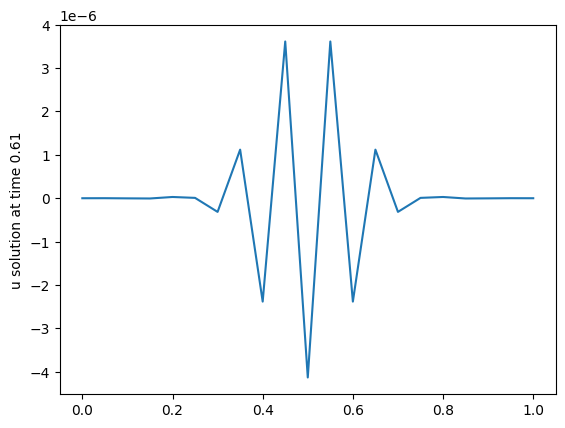

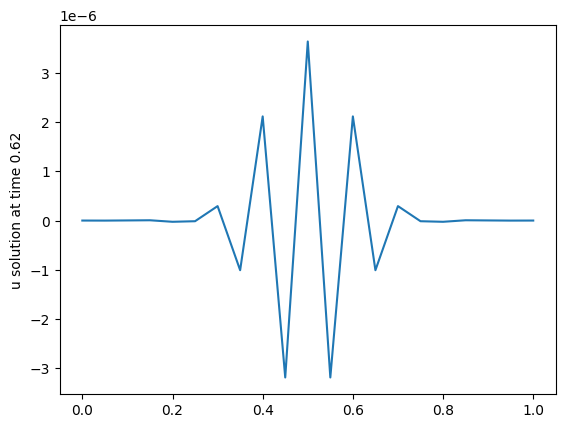

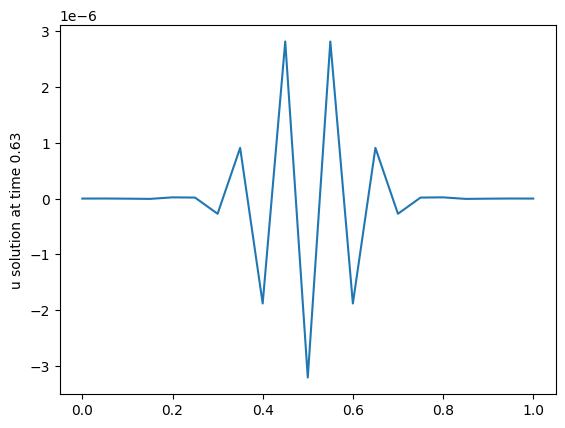

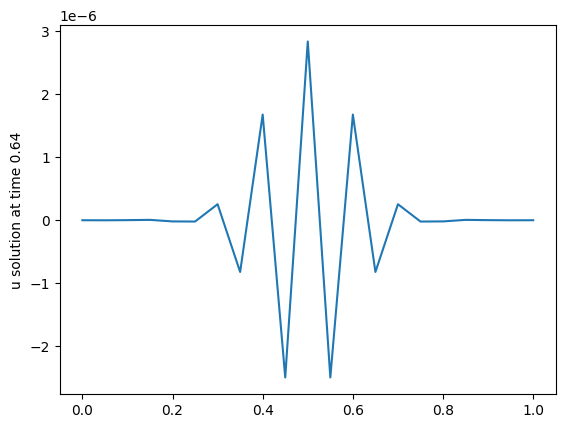

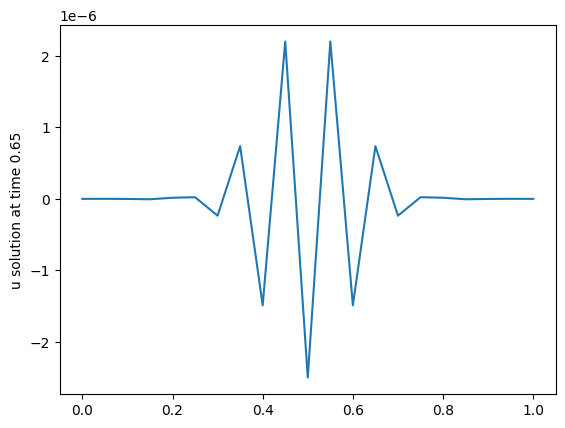

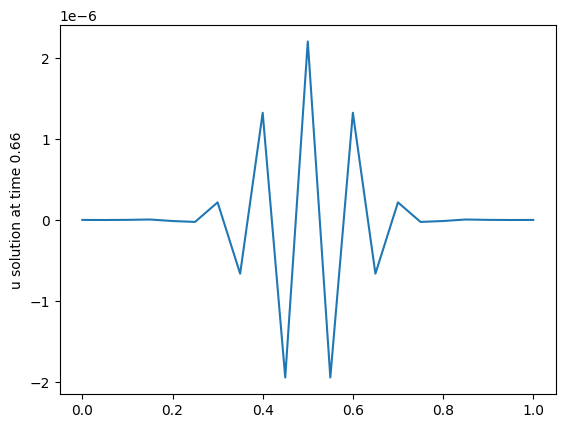

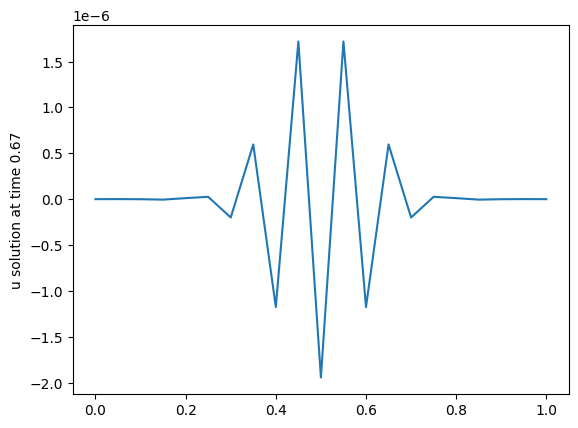

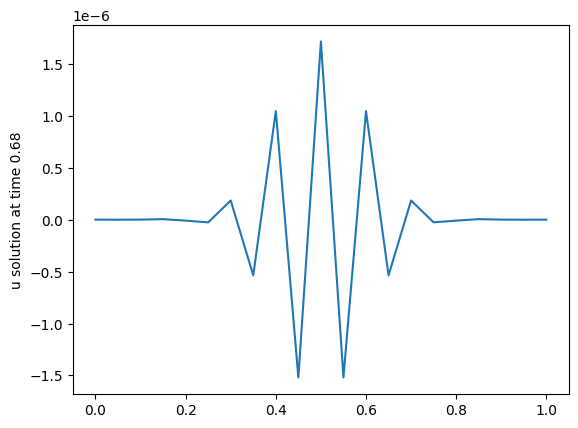

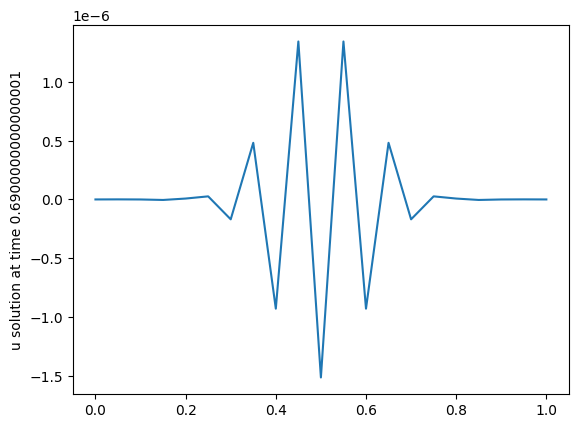

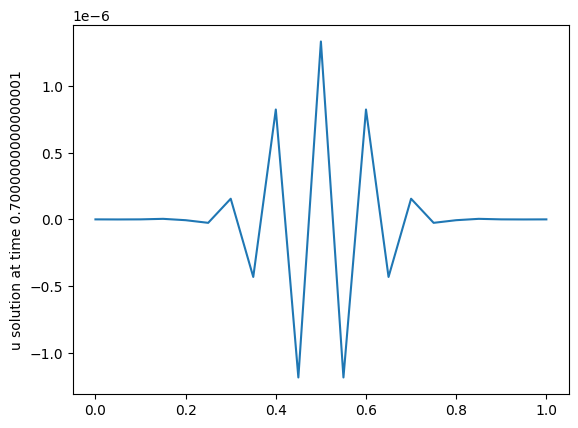

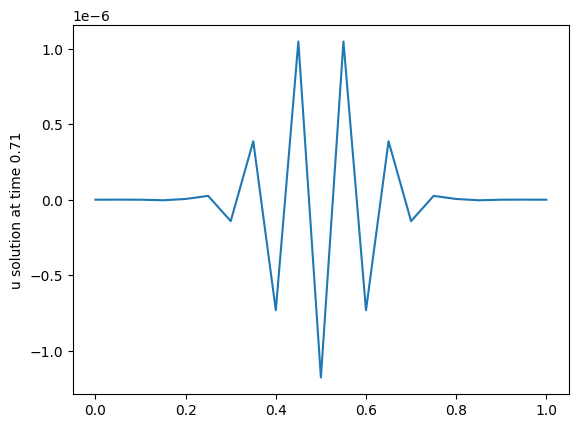

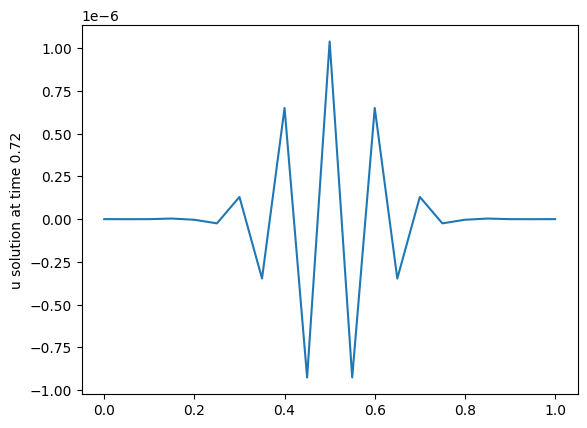

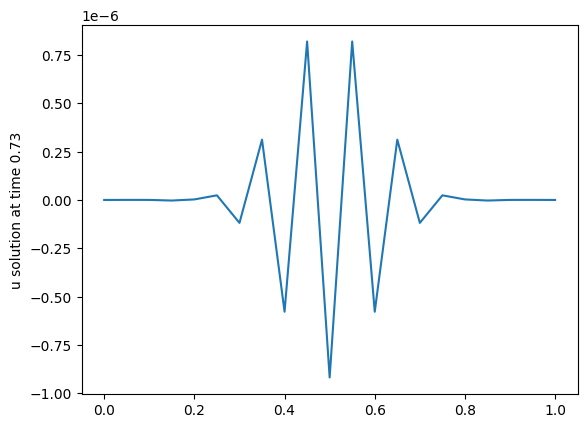

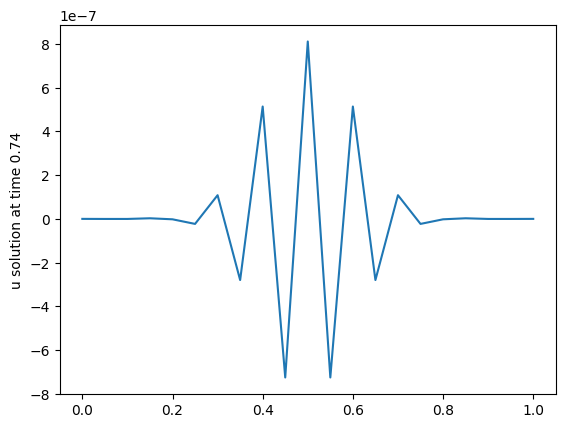

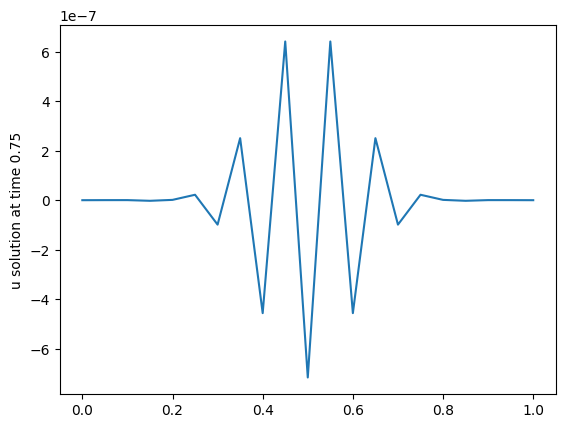

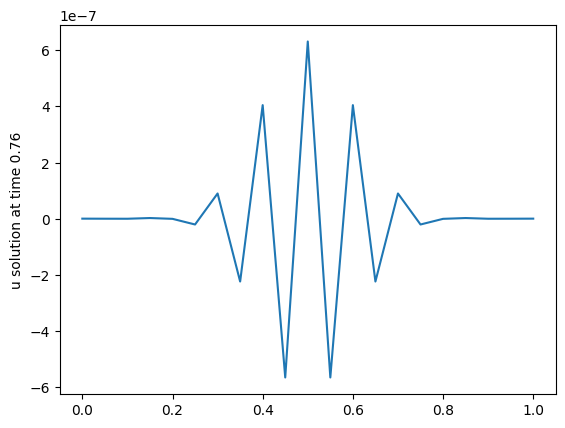

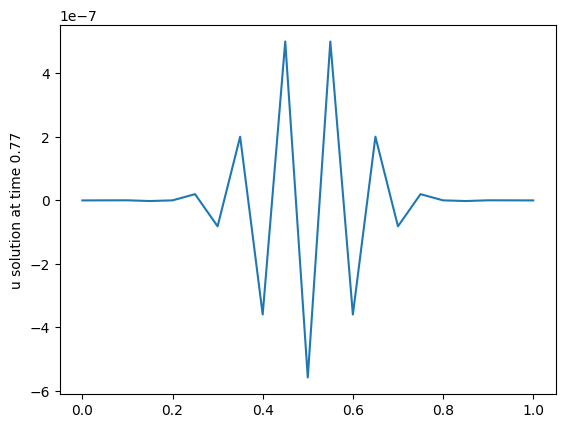

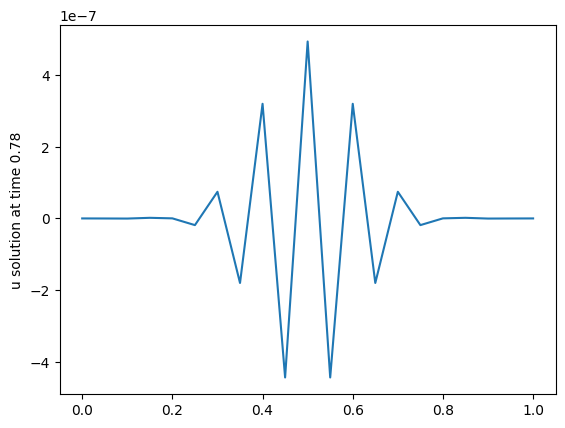

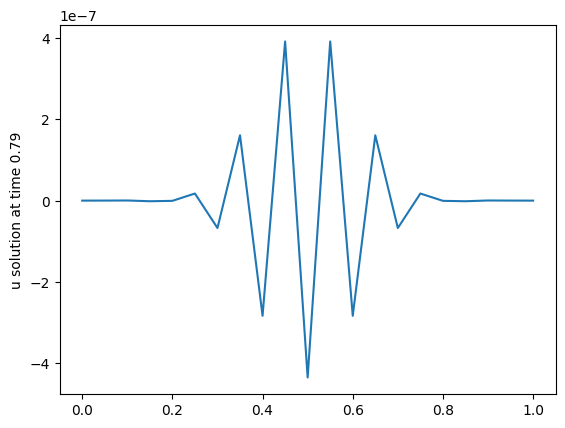

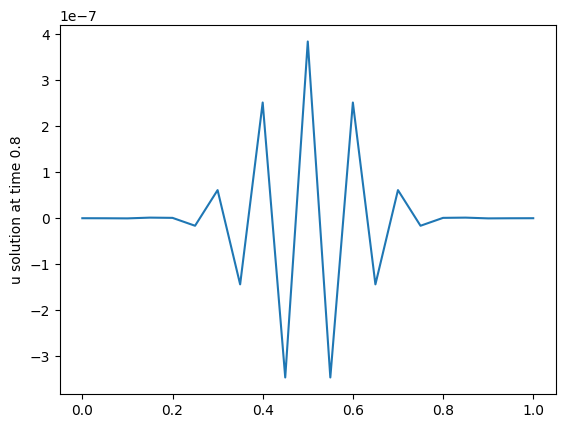

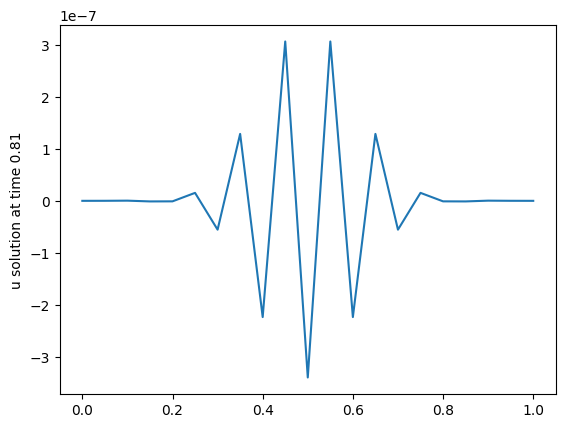

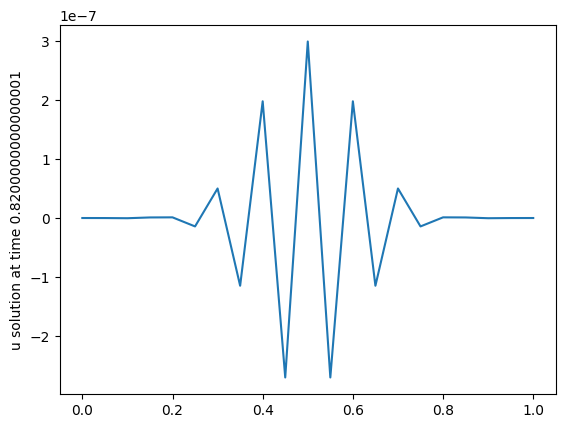

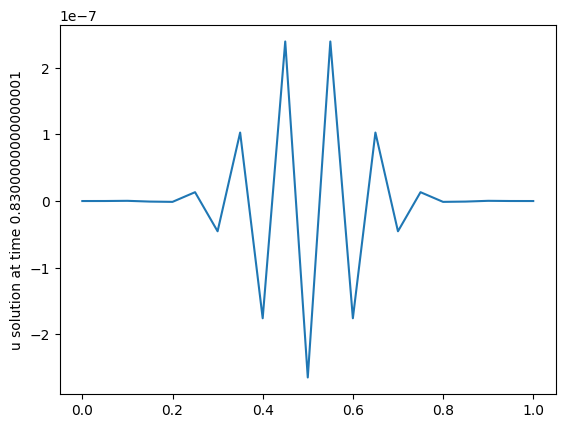

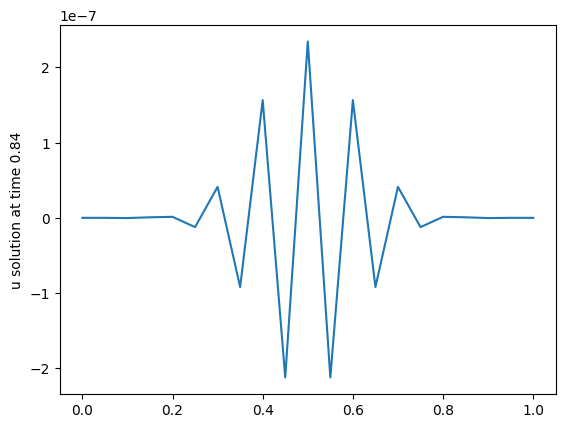

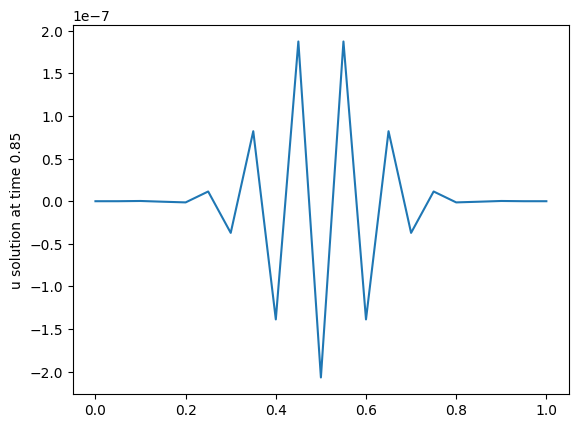

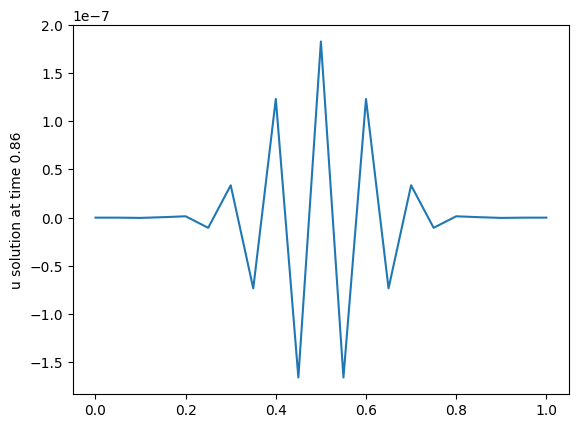

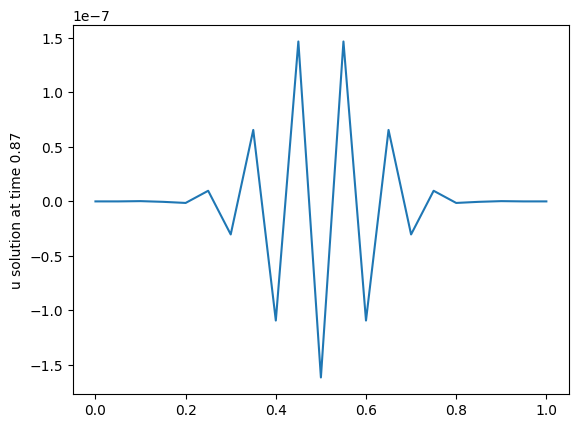

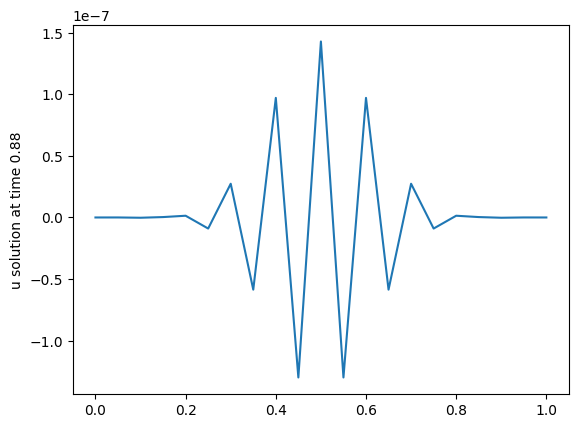

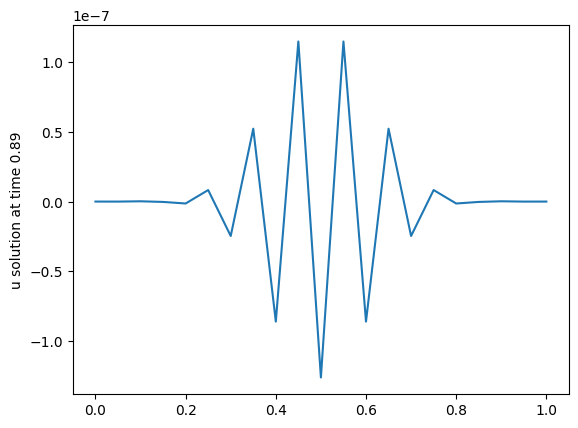

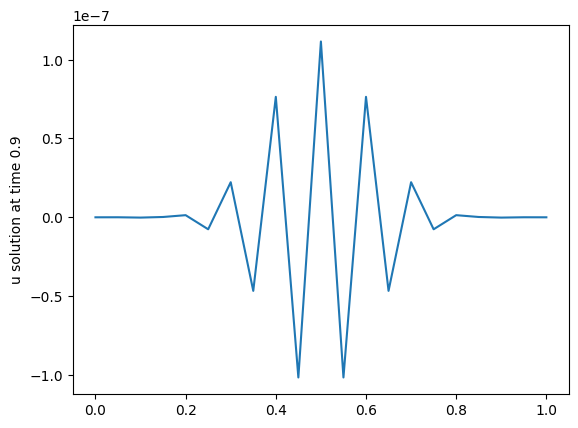

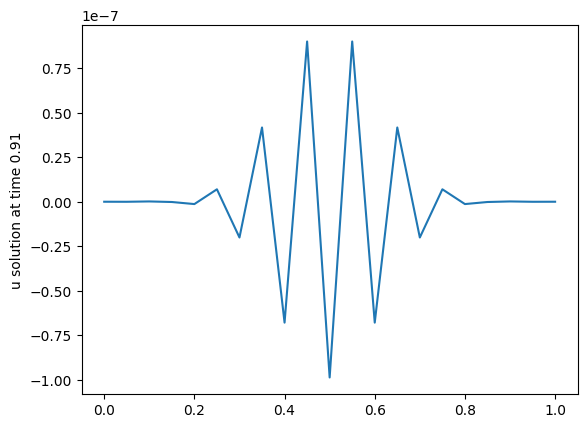

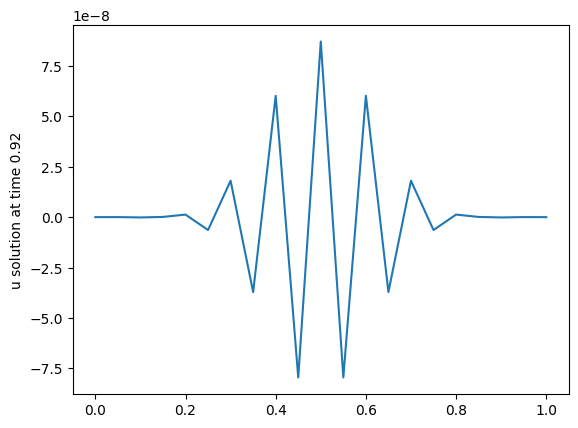

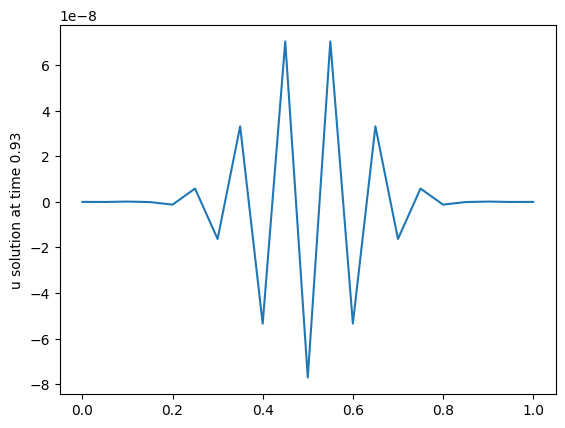

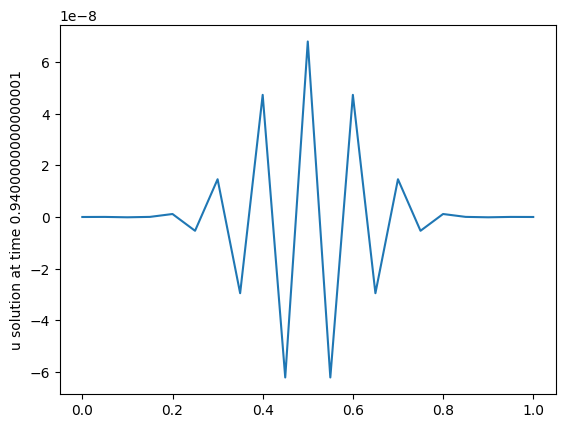

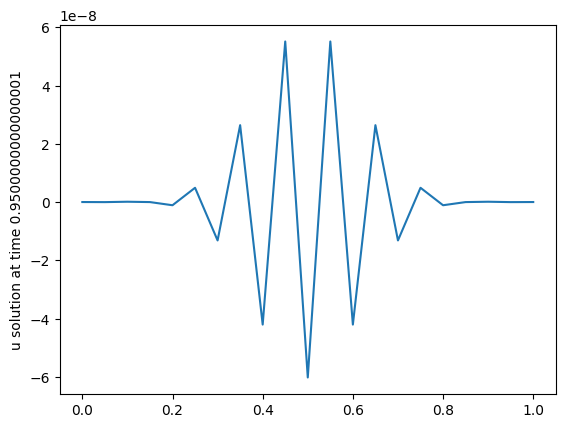

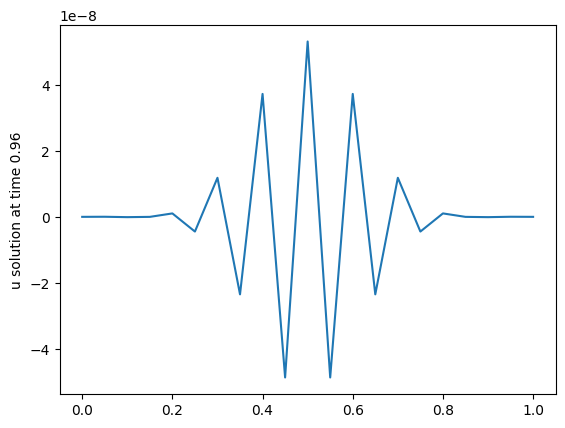

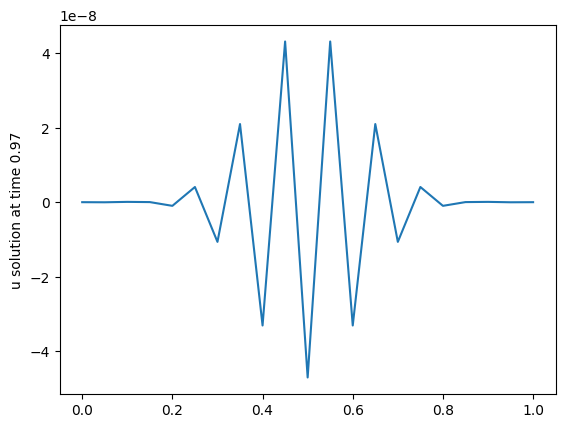

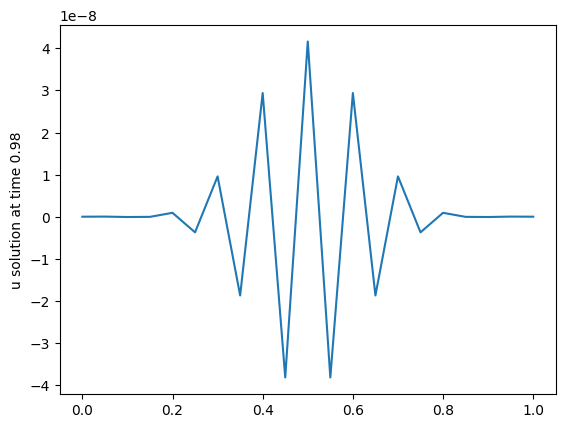

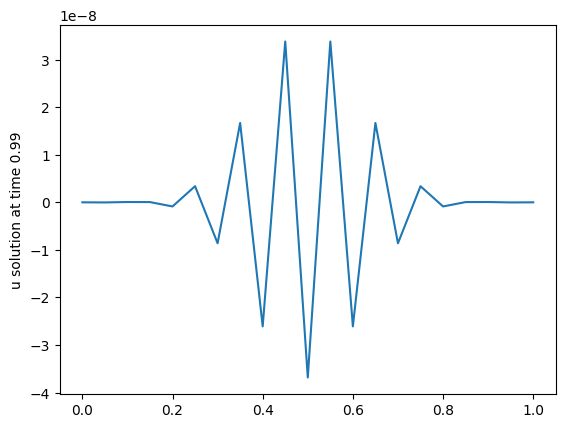

In [3]:
dt = 0.01
dx = 0.05
w_solution = heat_equation_solution_2(dt,dx,u_0)
plot_soln(w_solution,dt,dx)

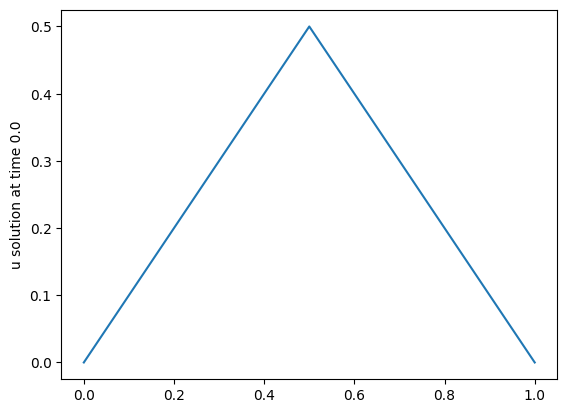

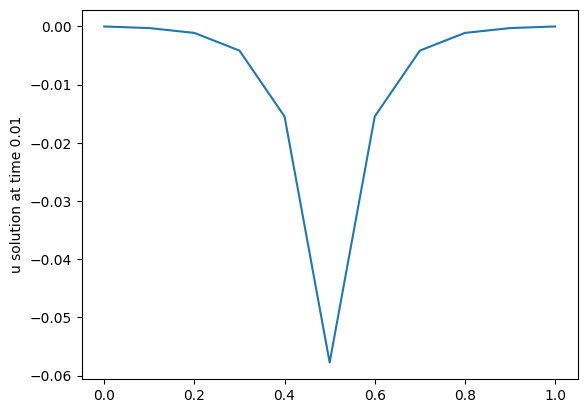

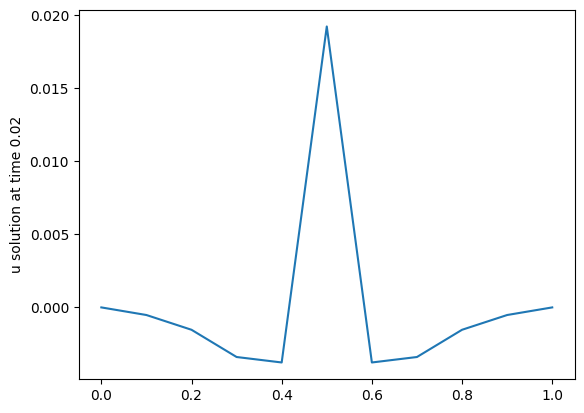

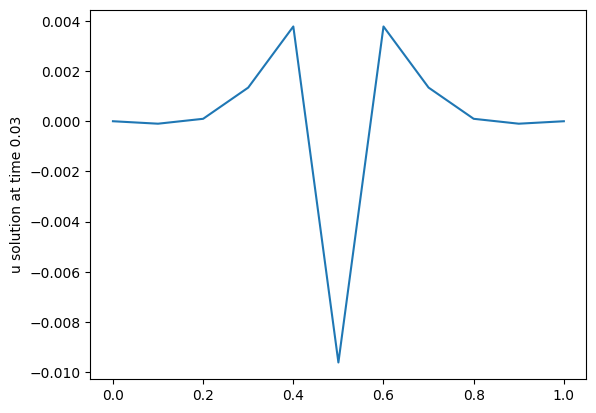

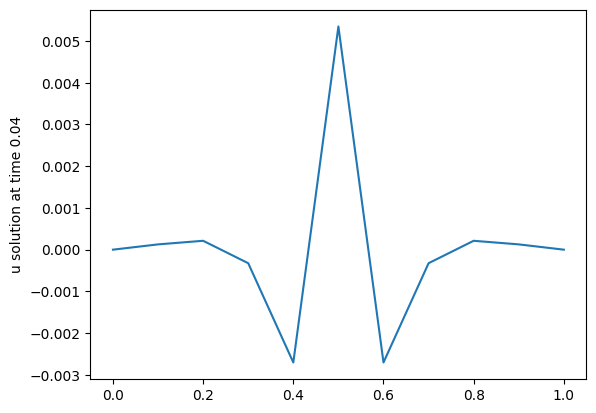

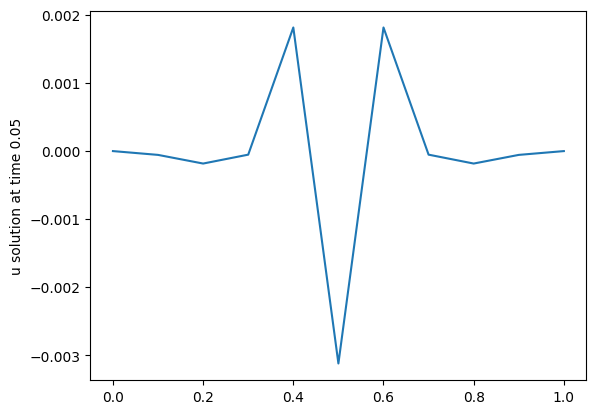

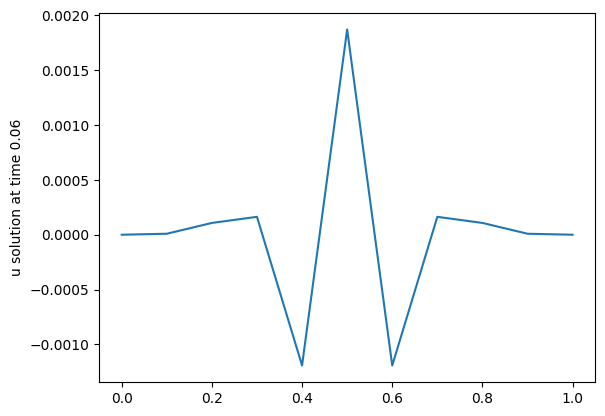

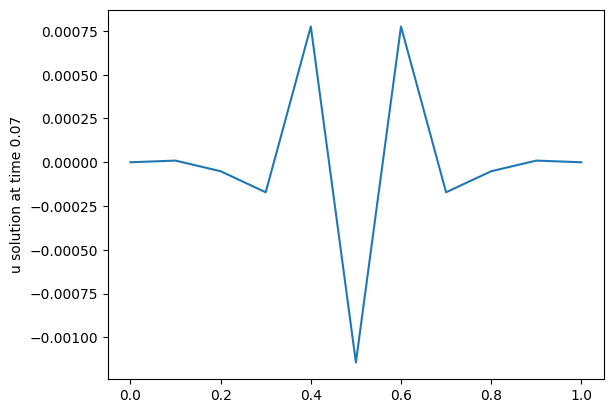

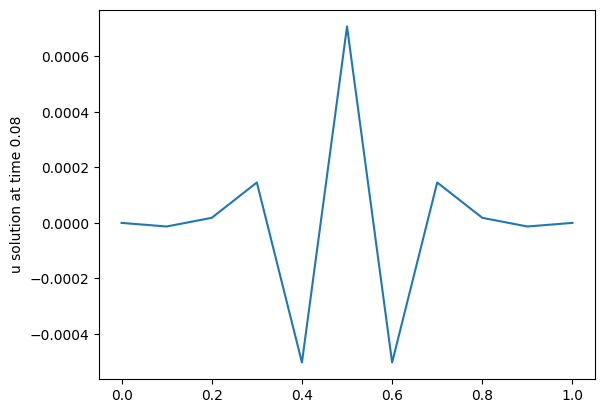

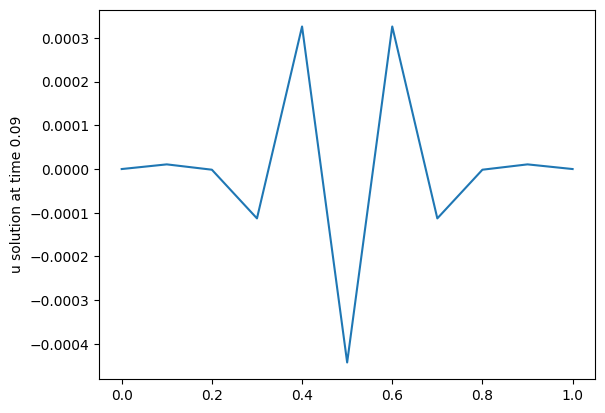

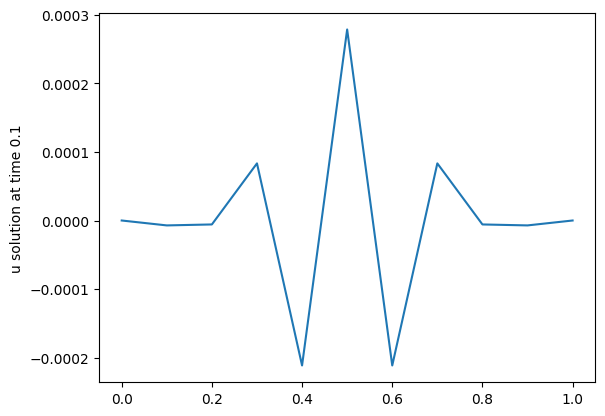

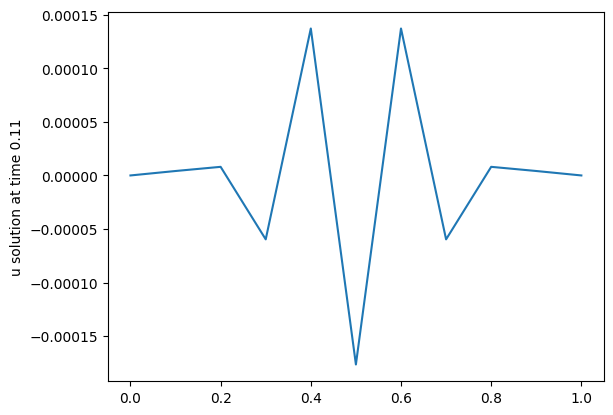

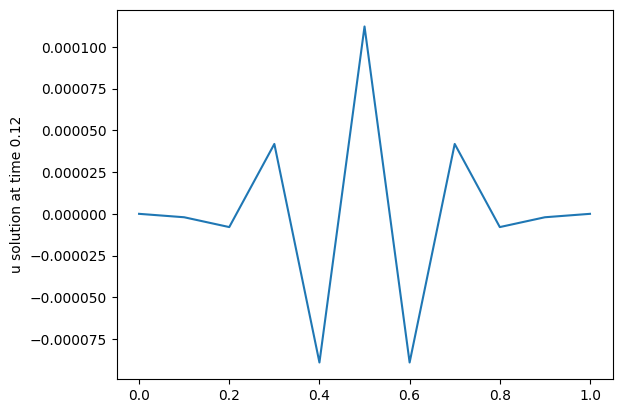

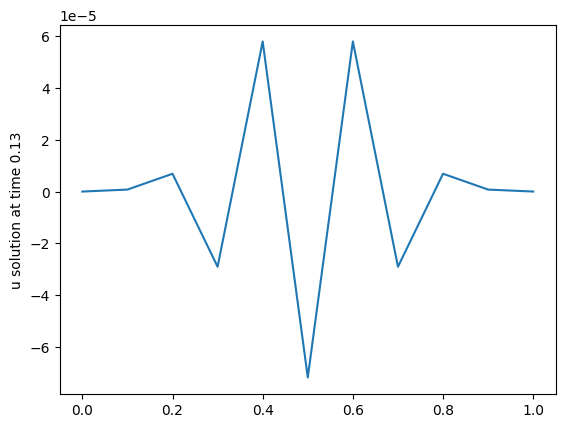

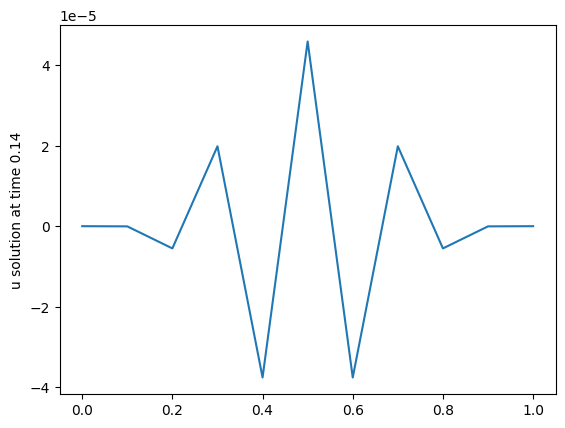

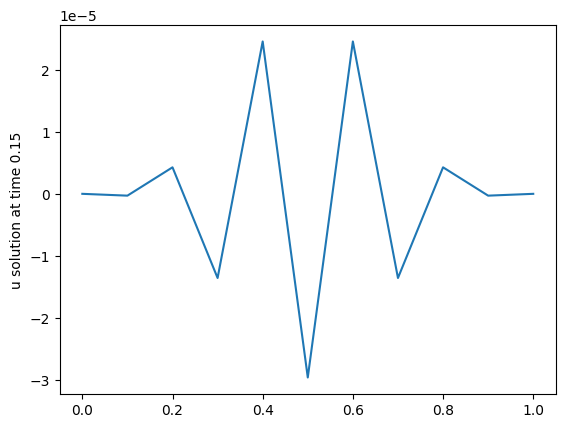

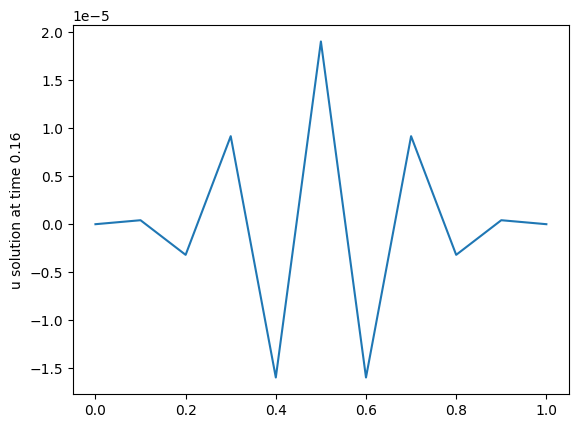

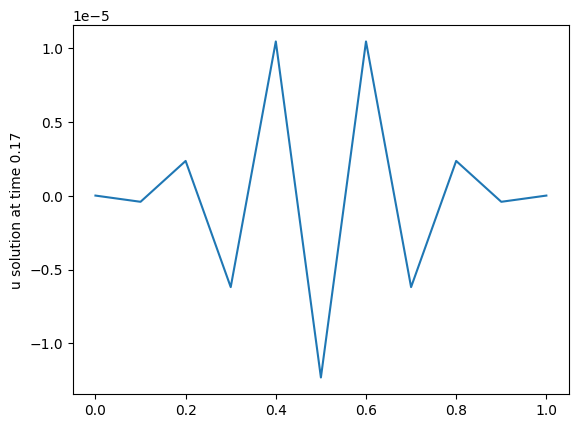

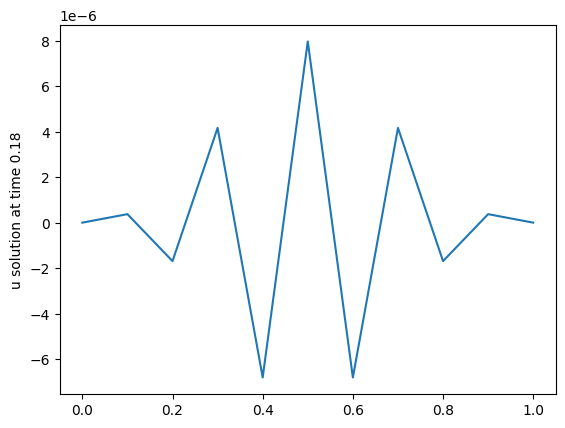

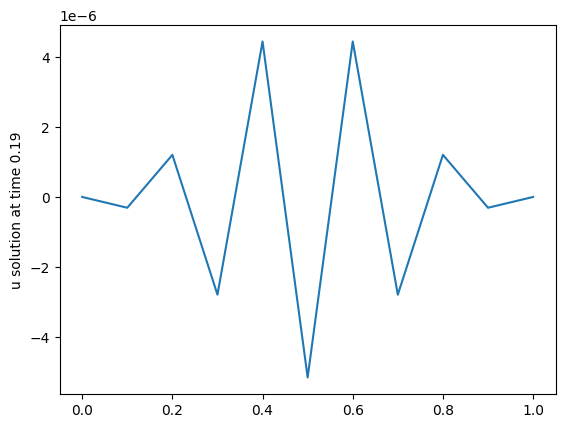

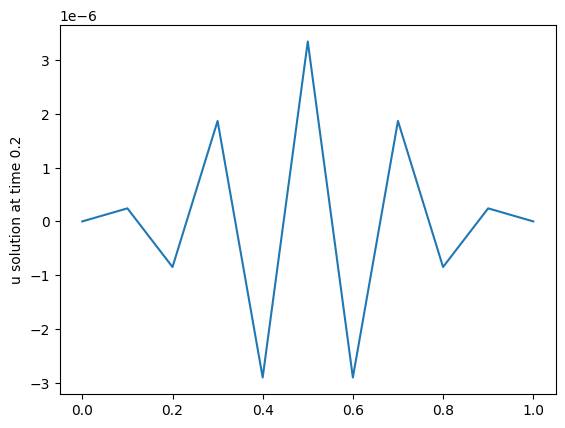

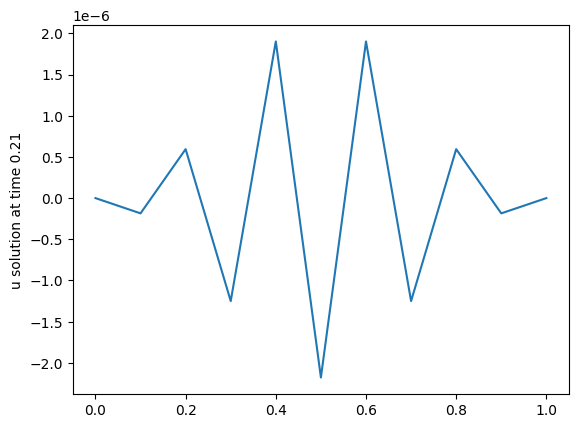

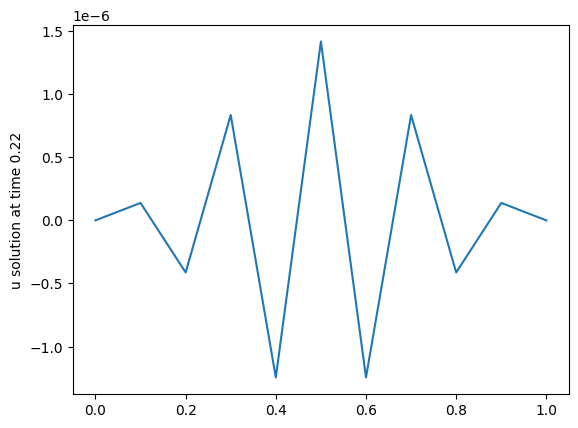

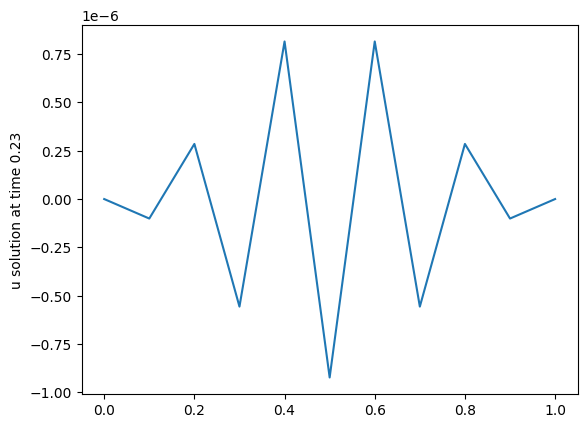

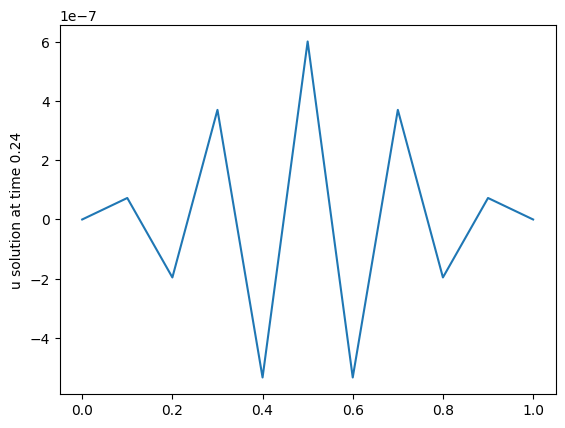

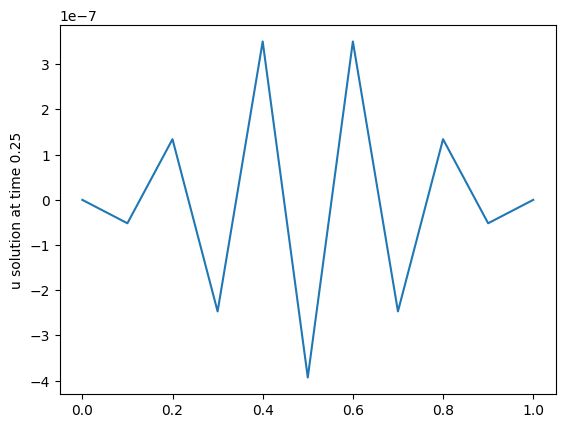

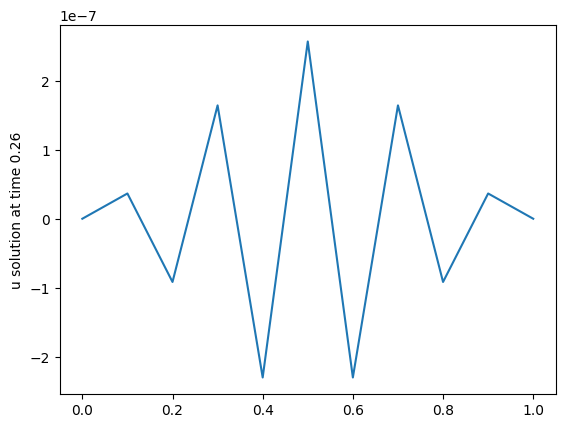

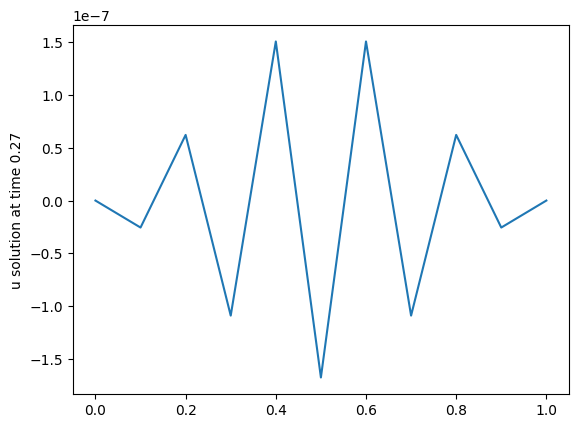

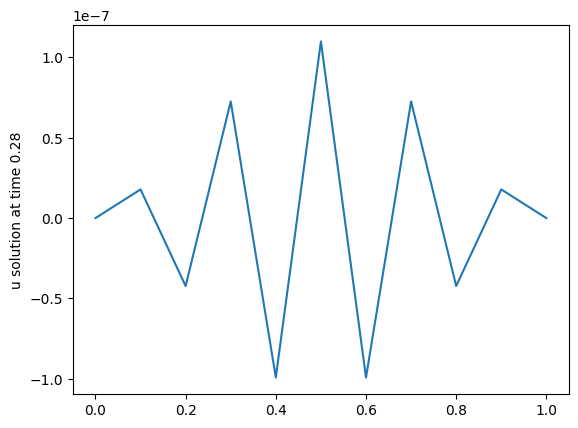

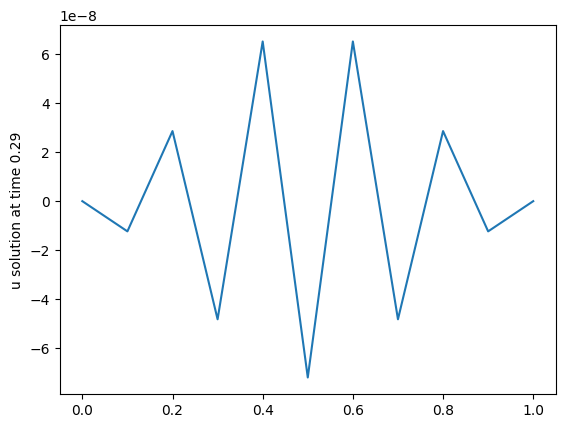

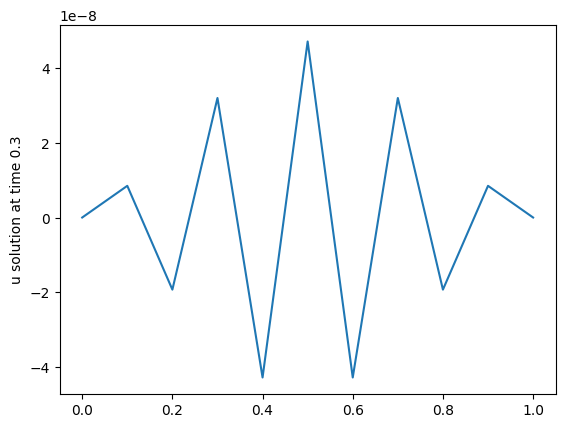

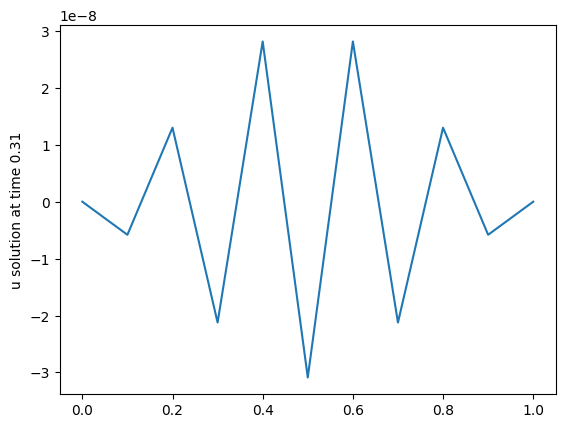

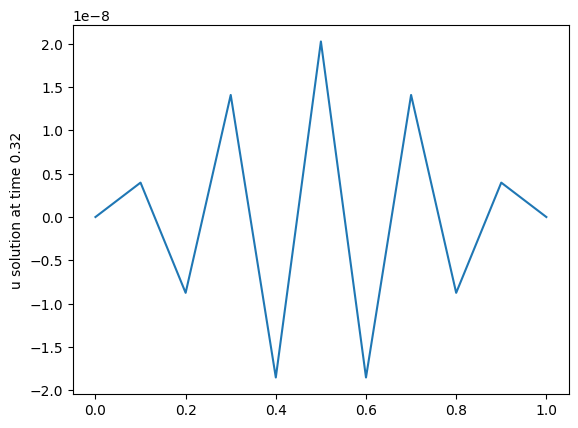

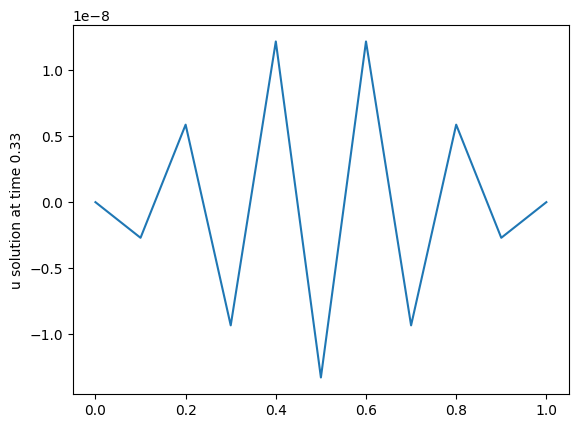

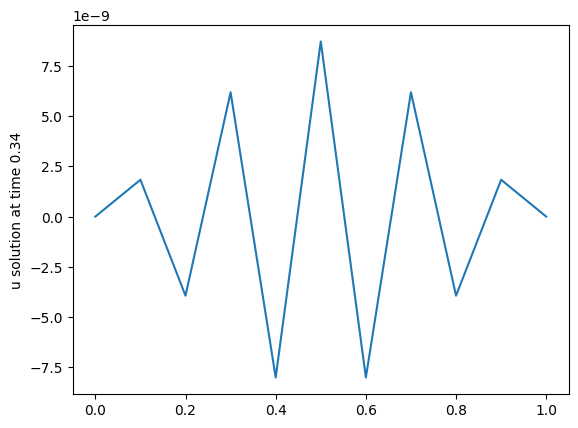

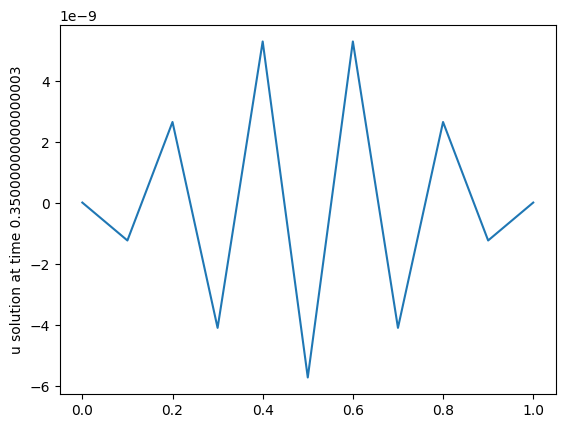

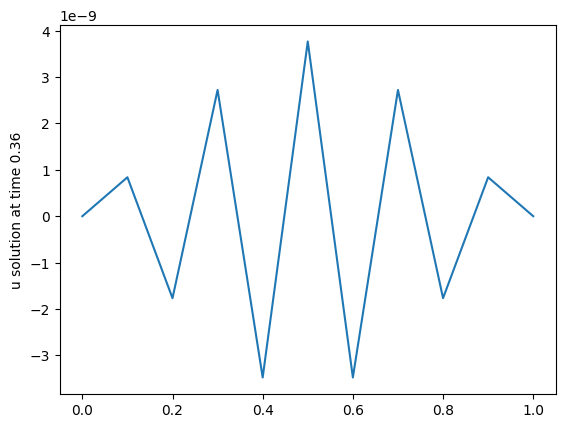

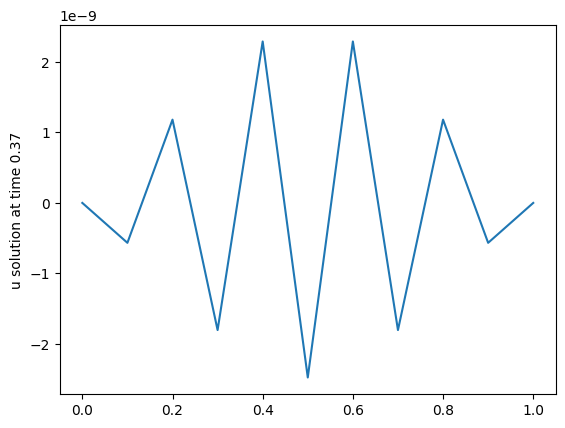

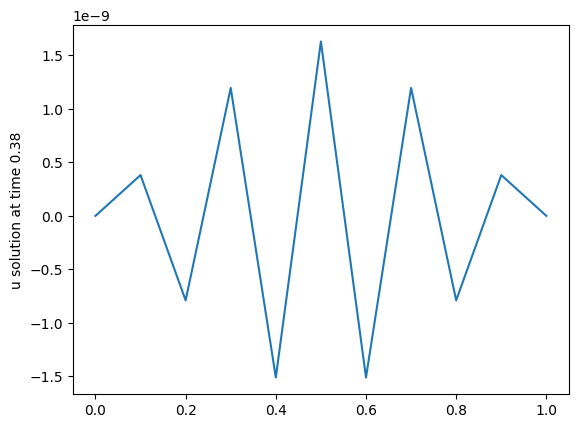

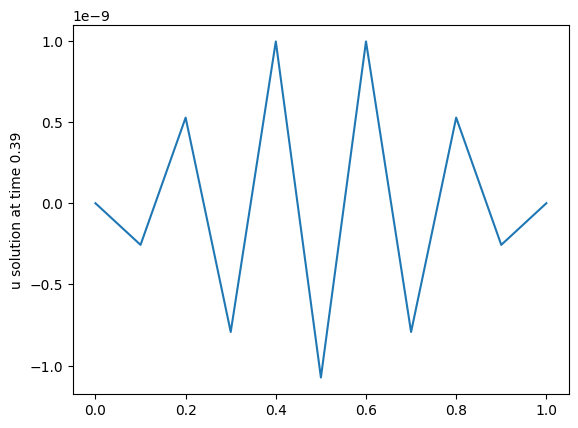

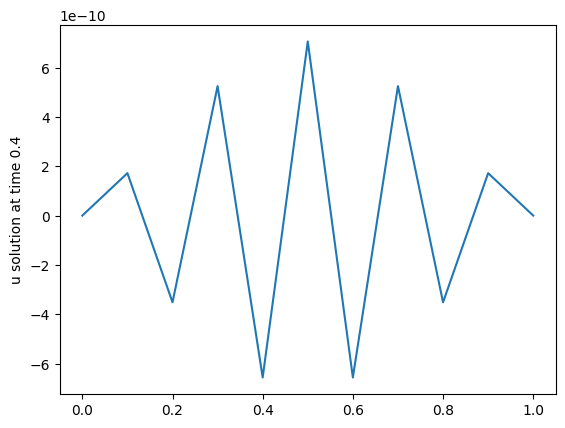

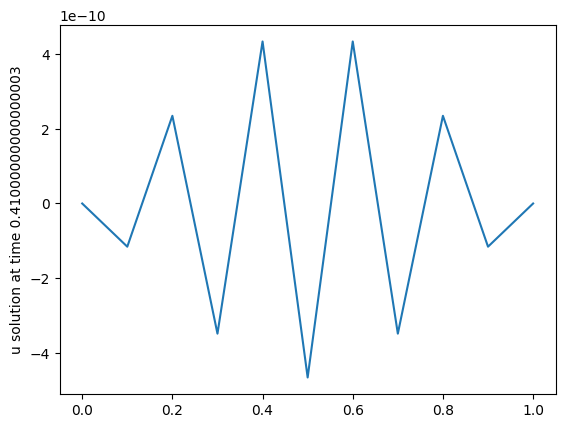

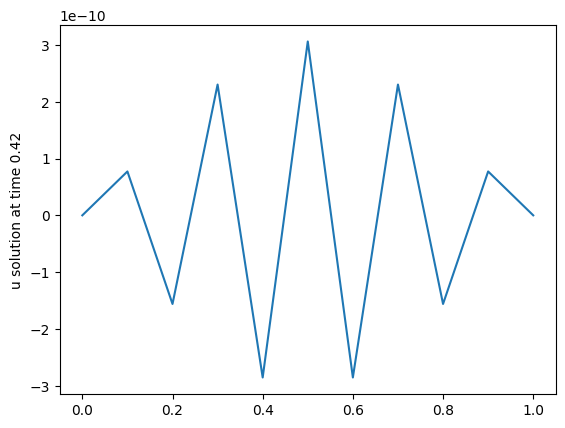

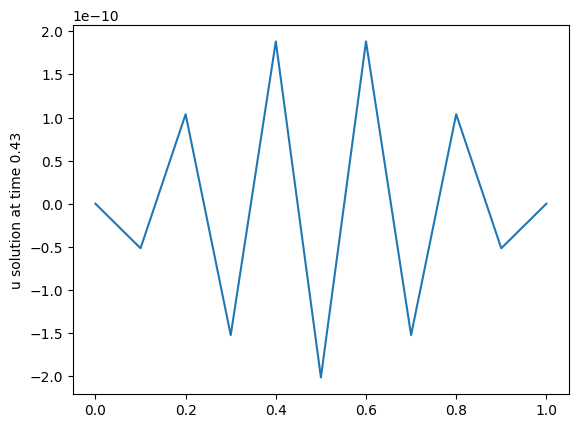

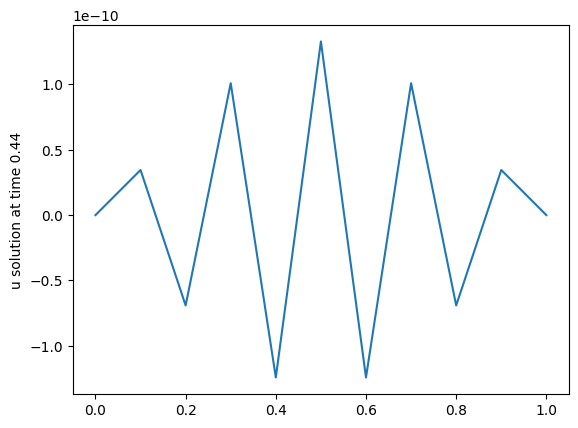

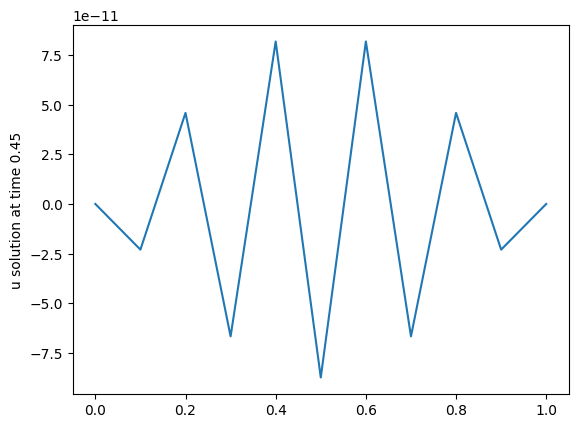

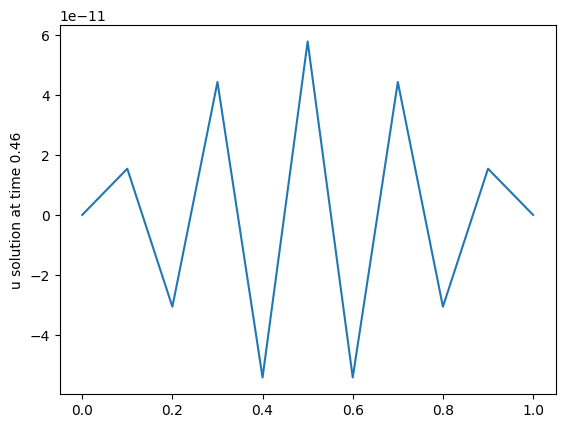

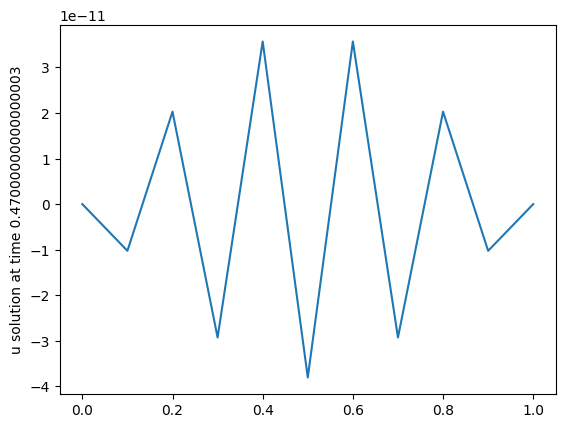

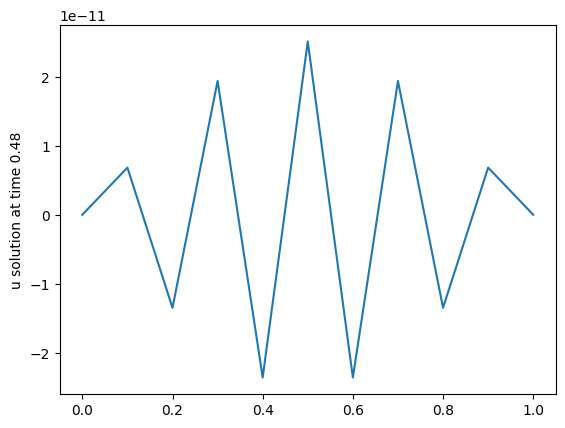

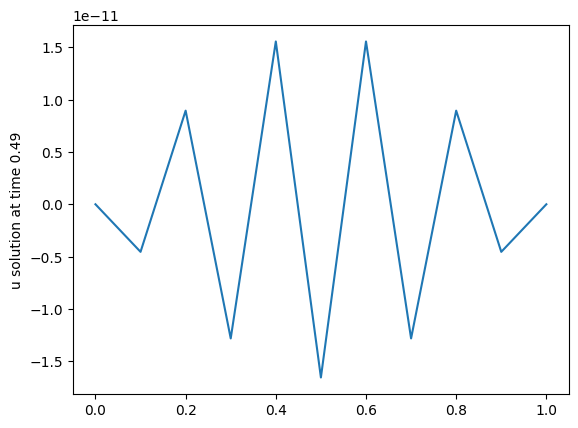

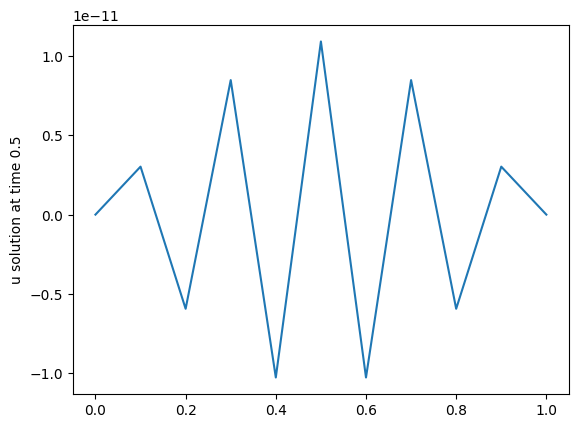

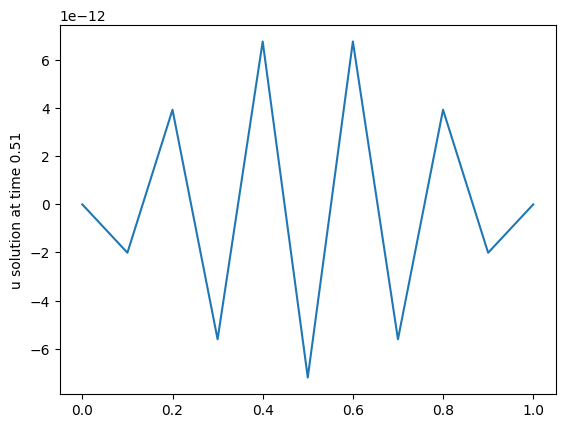

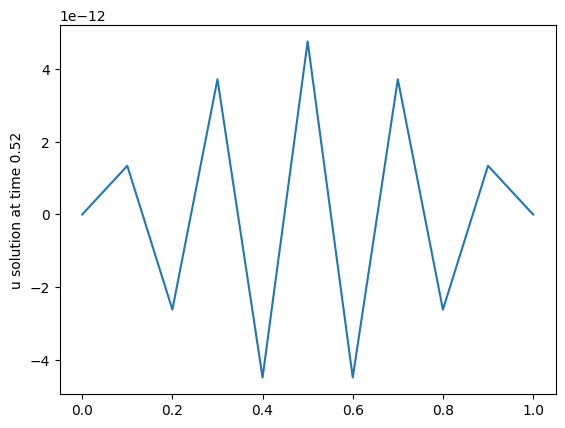

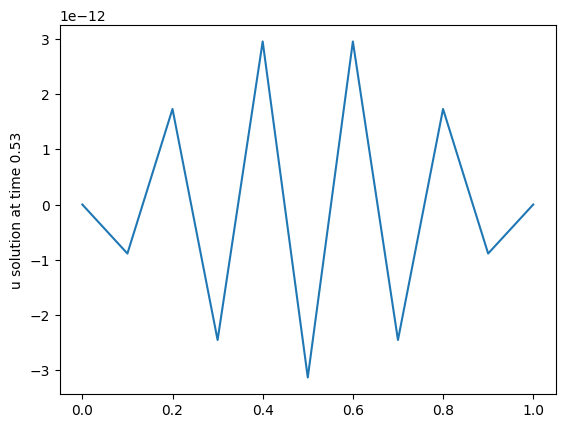

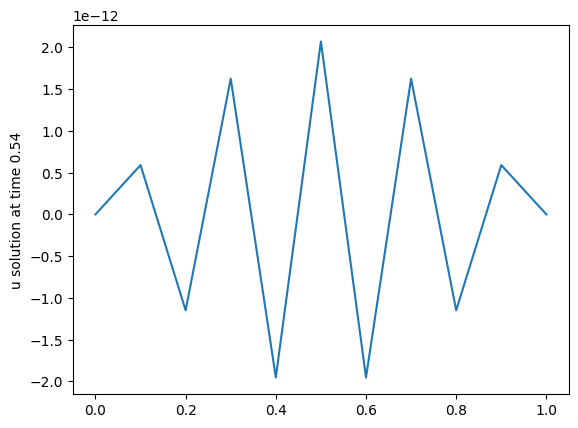

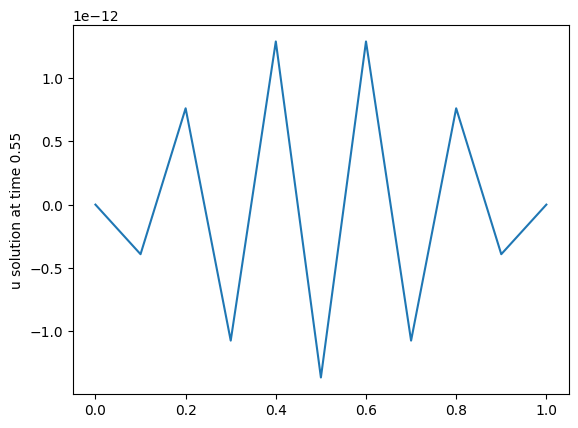

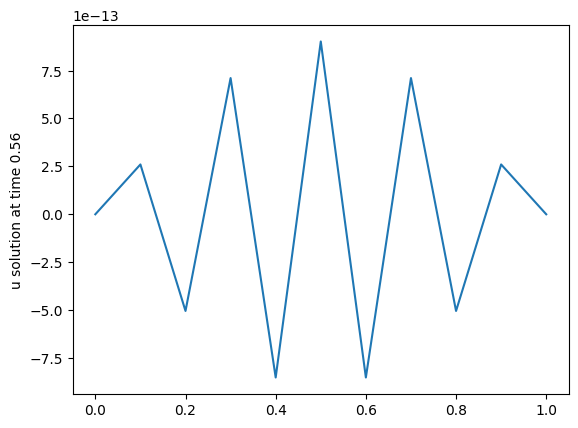

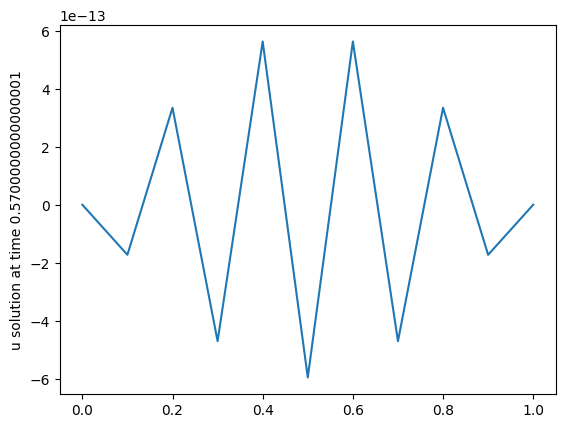

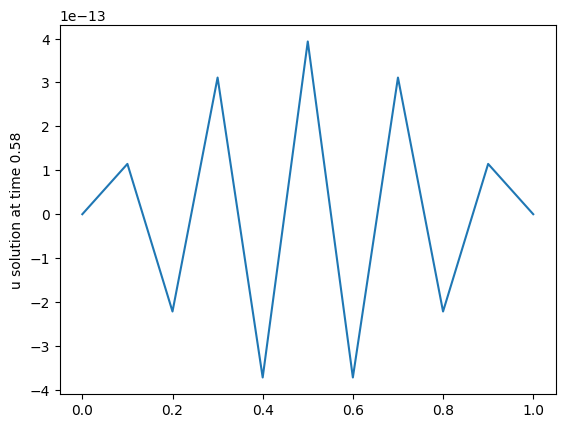

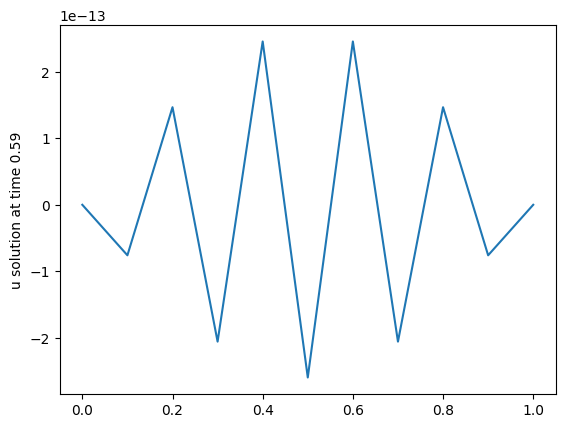

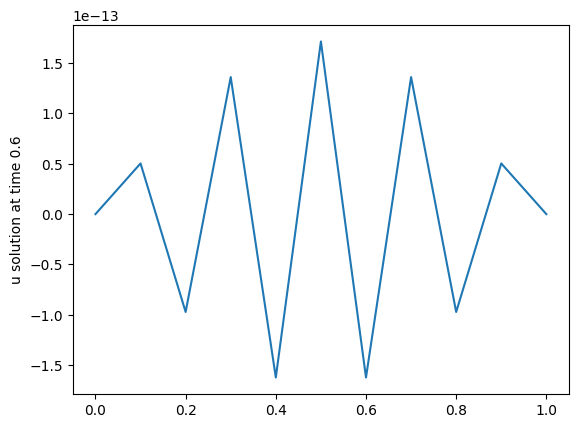

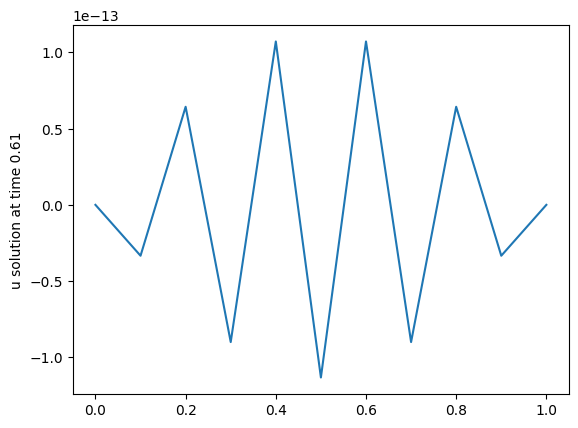

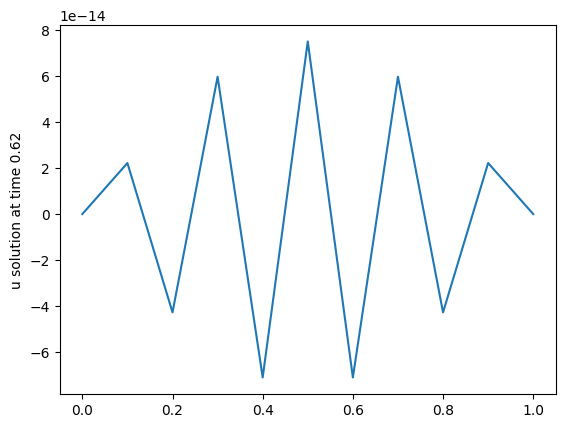

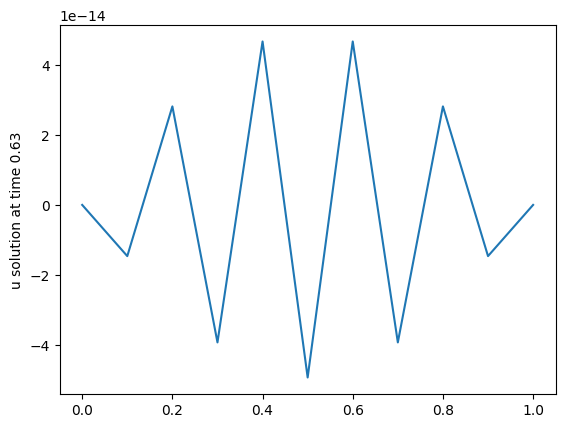

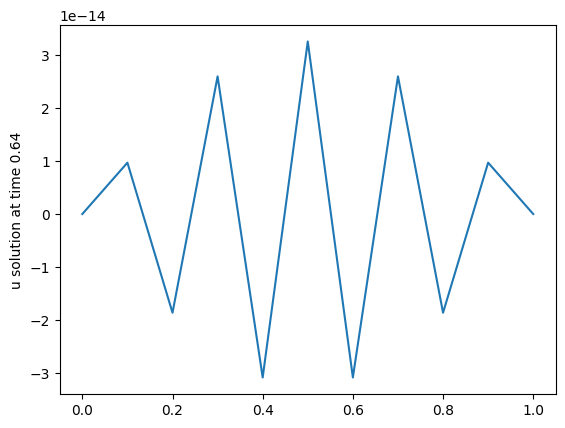

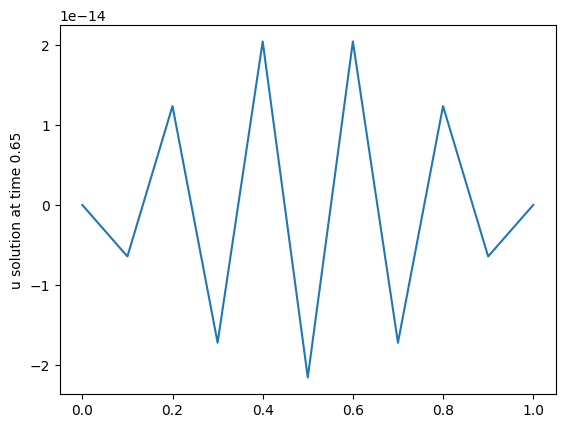

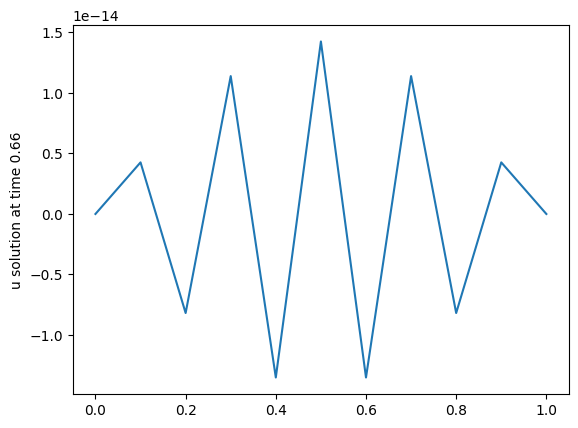

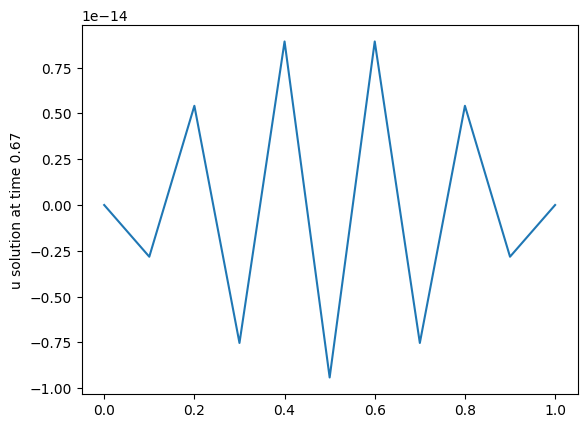

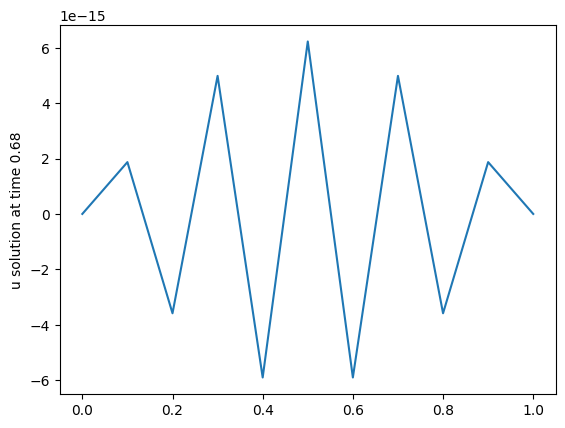

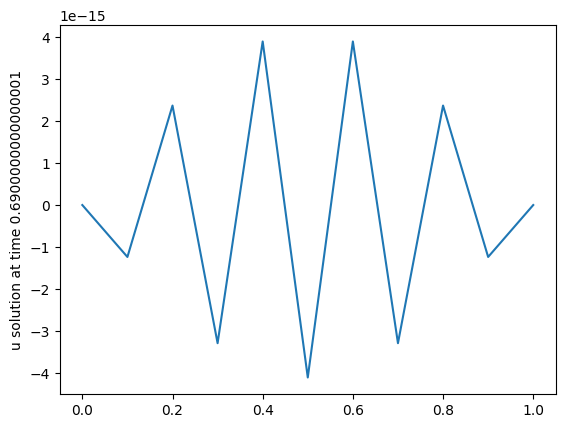

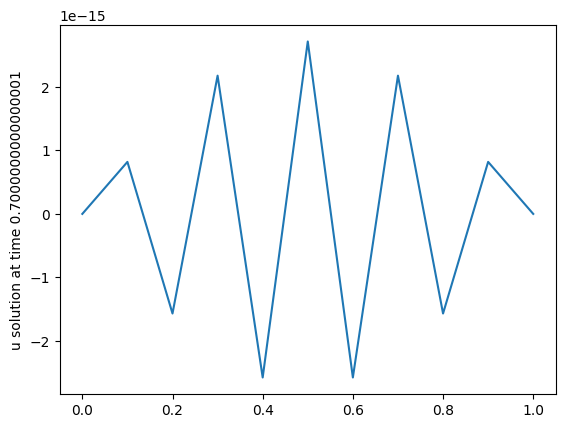

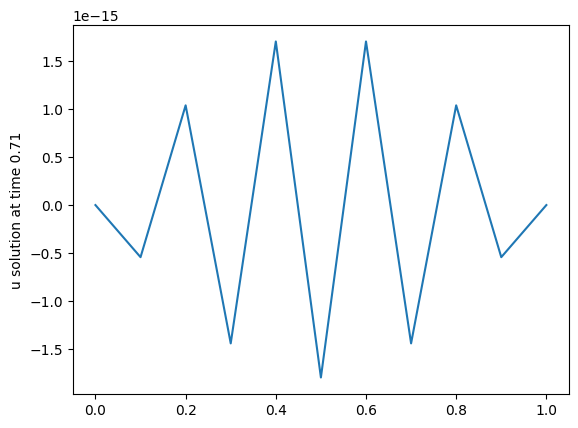

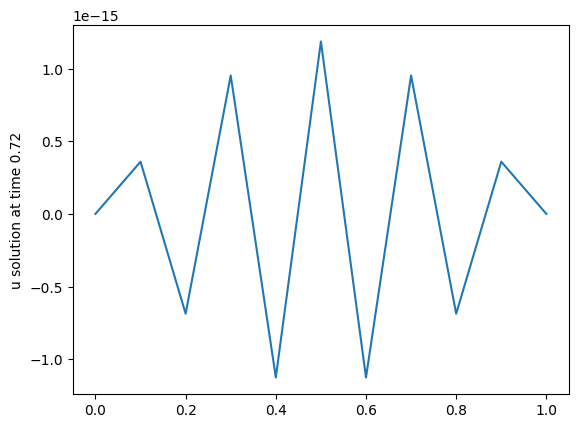

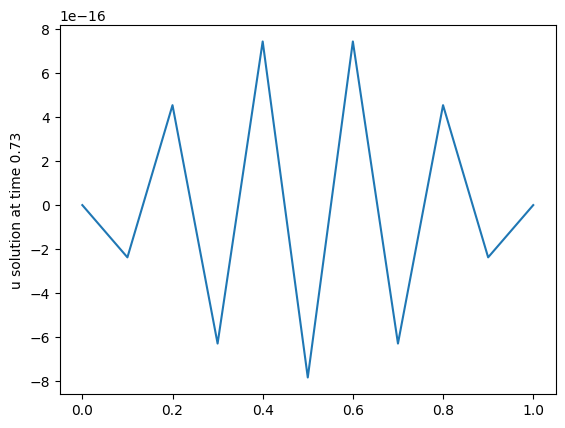

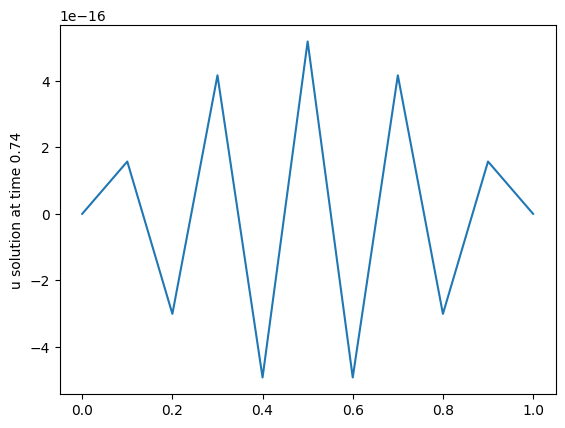

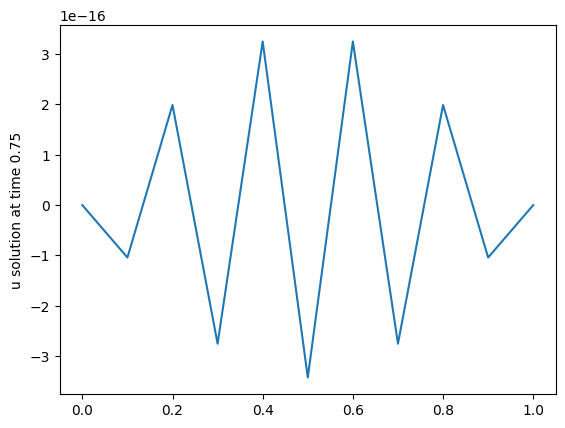

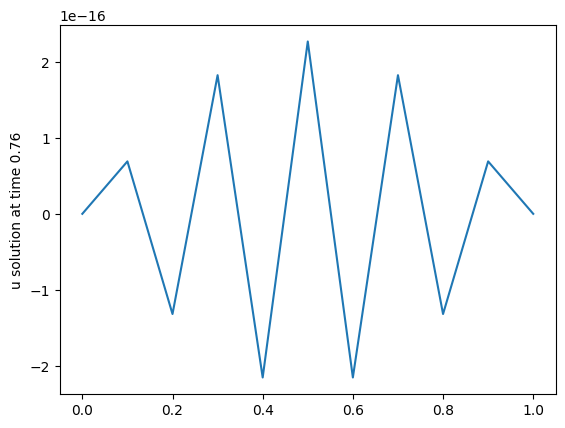

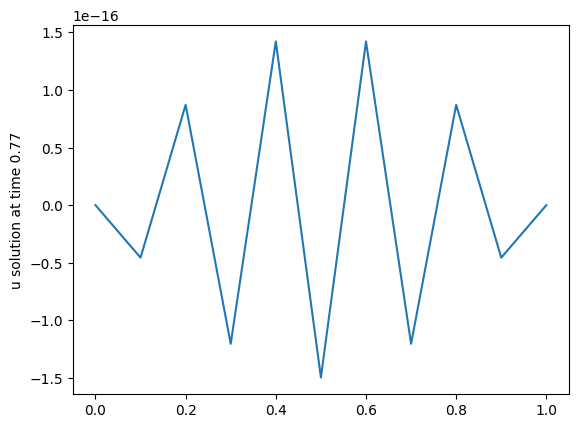

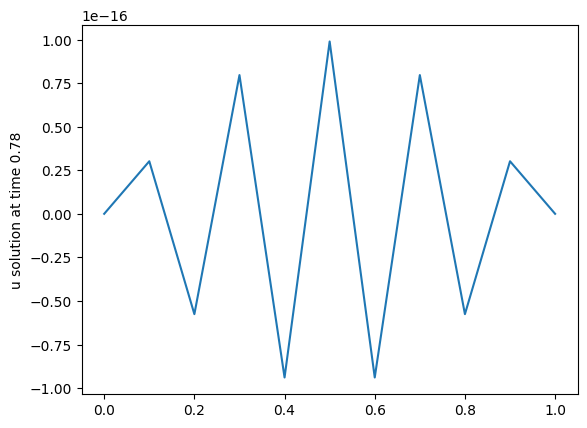

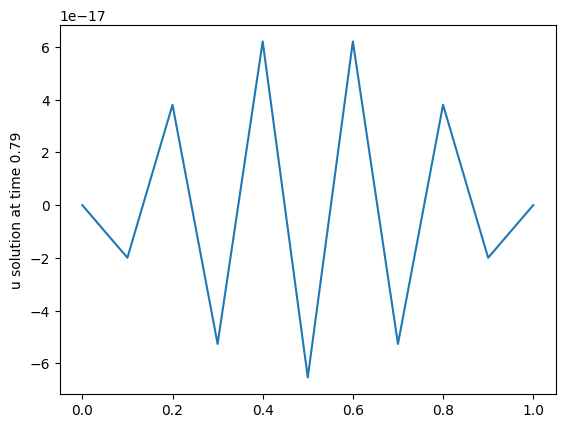

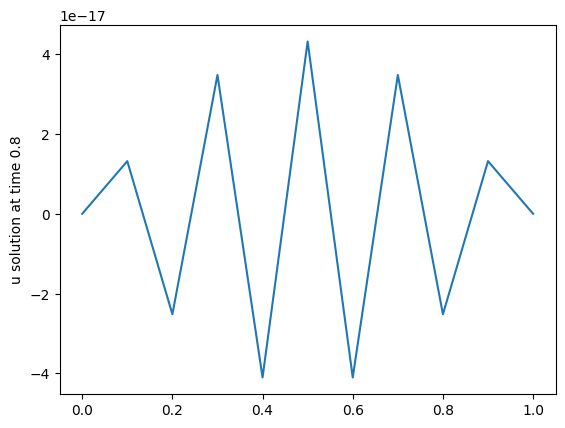

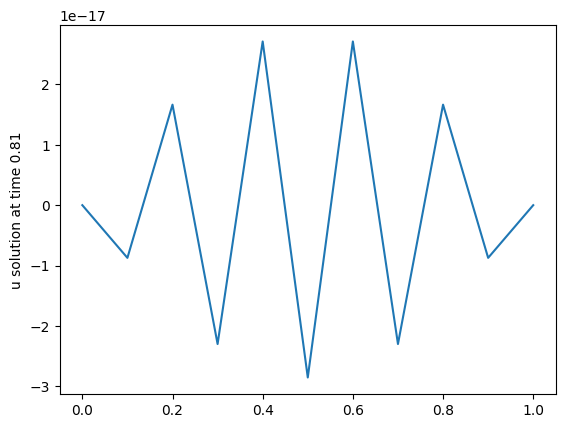

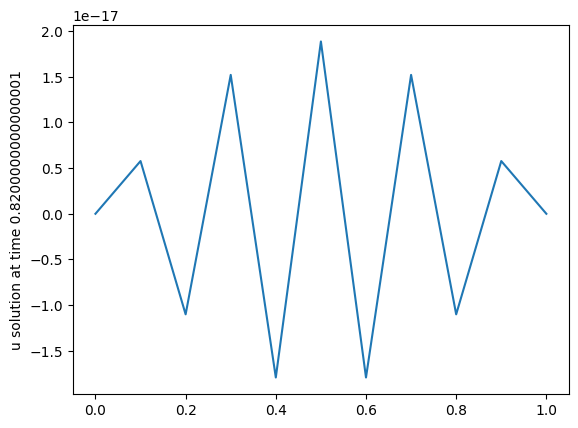

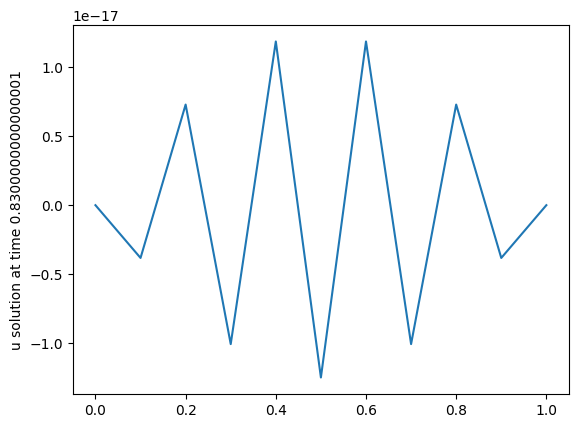

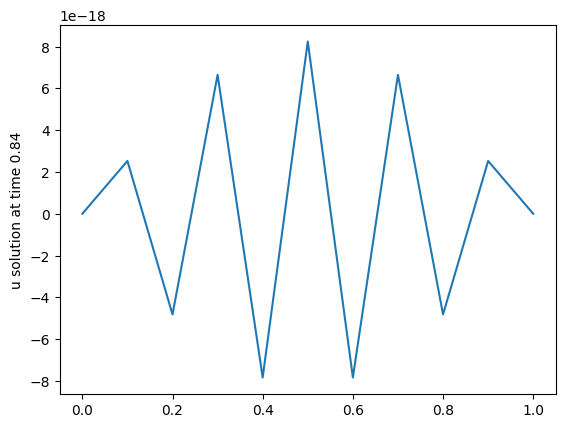

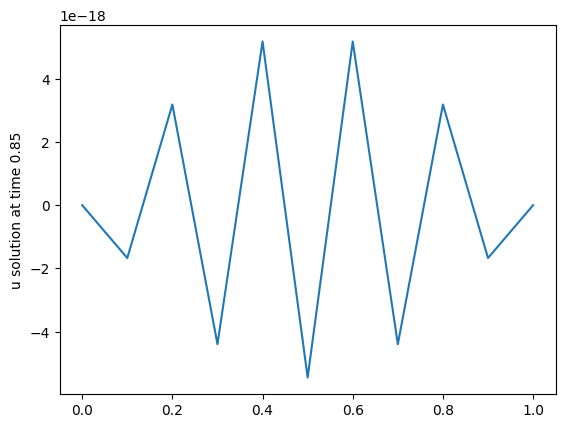

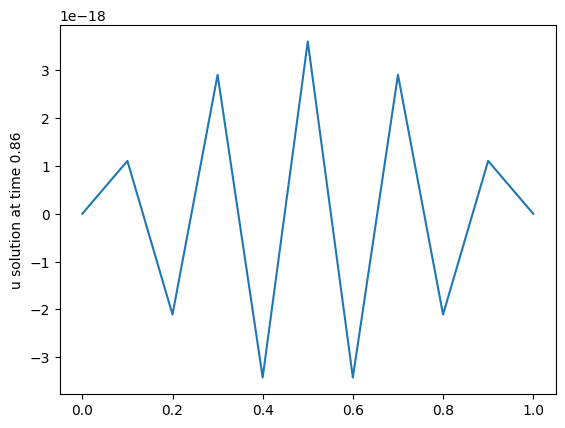

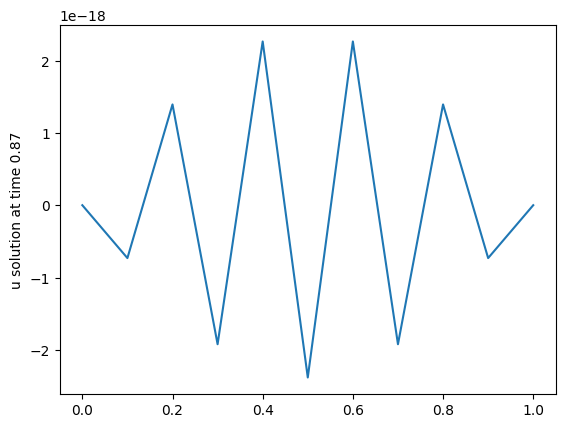

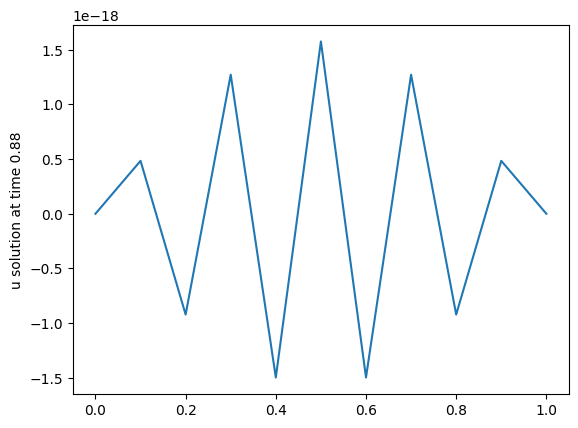

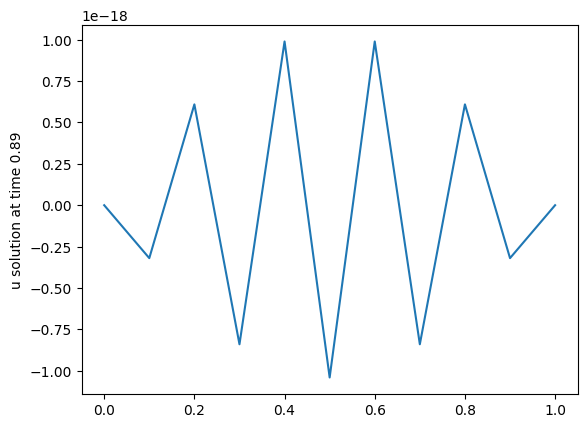

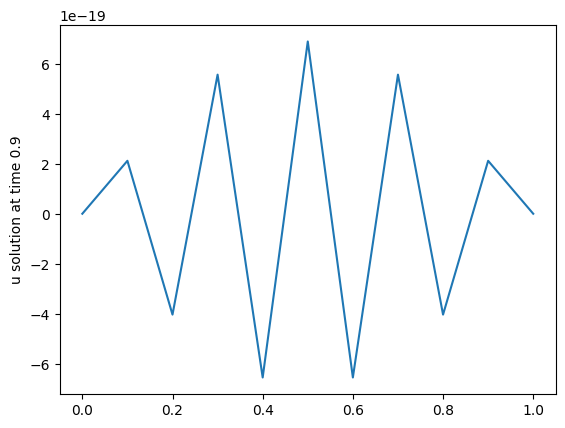

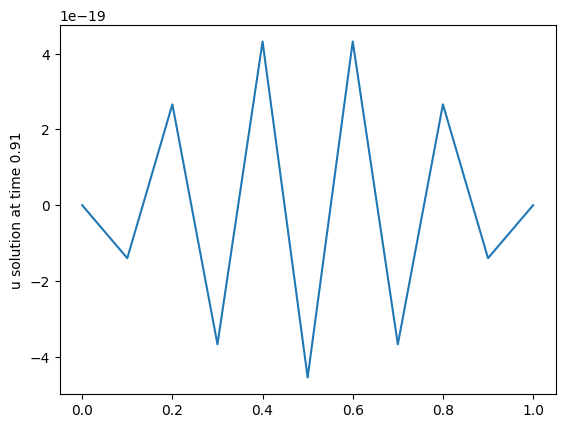

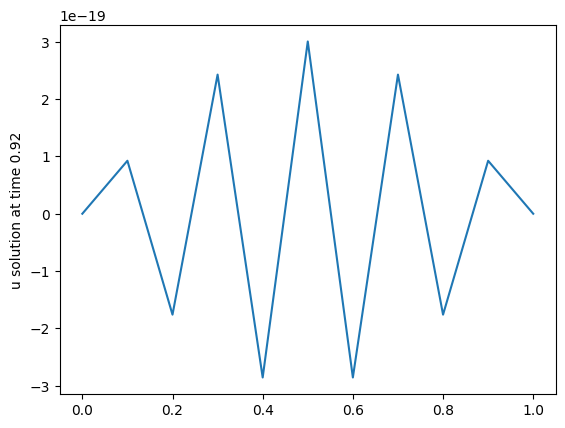

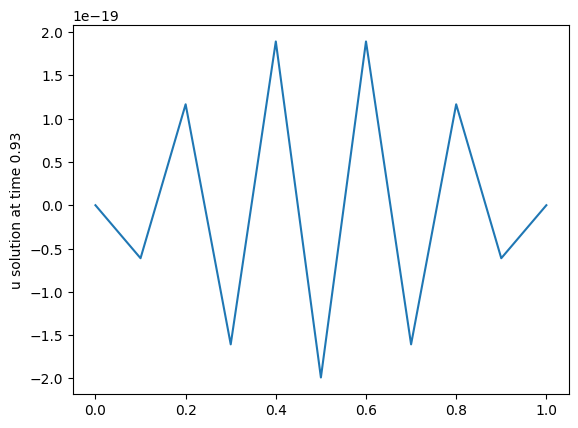

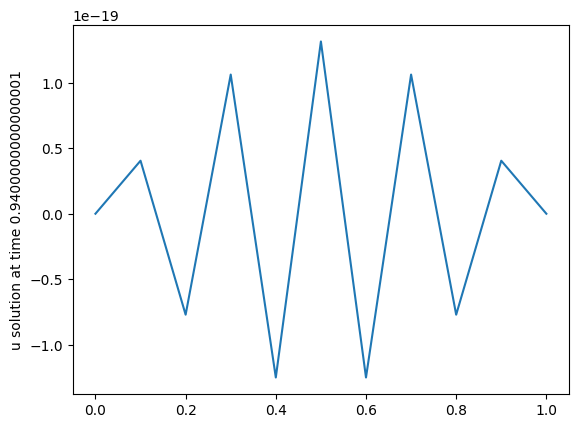

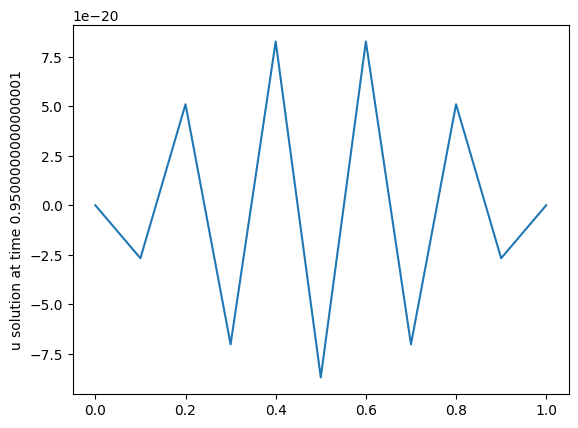

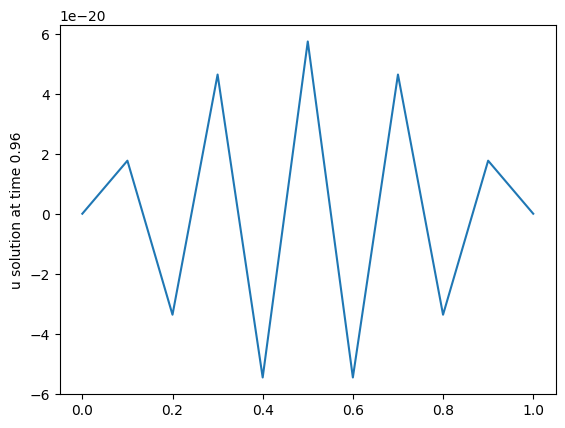

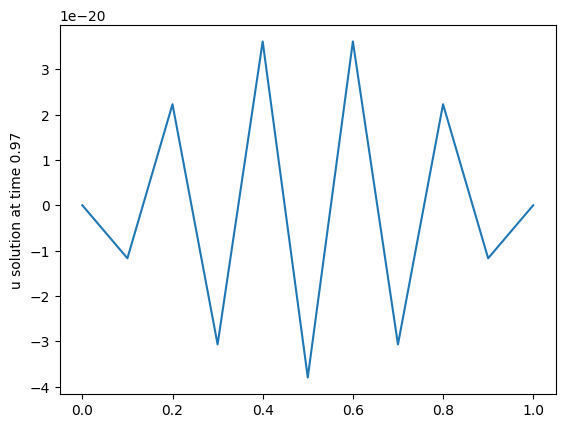

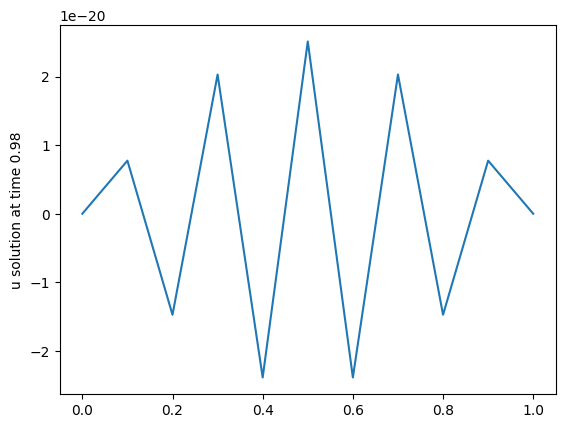

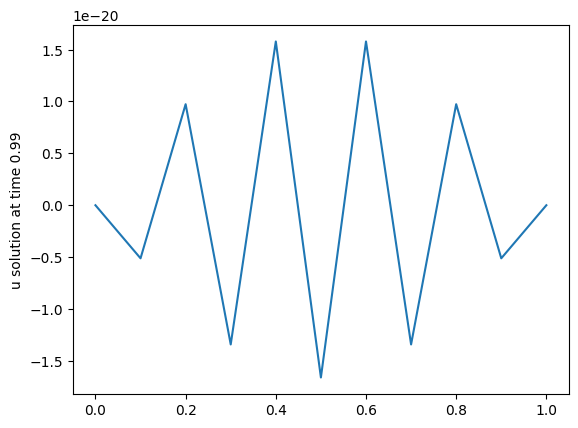

In [4]:
dt = 0.01
dx = 0.1
w_solution = heat_equation_solution_2(dt,dx,u_0)
plot_soln(w_solution,dt,dx)